# Анализ бизнес-показателей Procrastinate Pro+

## Описание

**Название проекта:**
`Анализ бизнес-показателей Procrastinate Pro+`

**Цель исследования:**  
Провести аналитическое исследование для развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

**Исходные данные:**  
Мы располагаем данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях,выгрузка их покупок за этот период, рекламные расходы. Структура данных описана ниже.

Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта:
- User Id— уникальный идентификатор пользователя,
- Region— страна пользователя,
- Device— тип устройства пользователя,
- Channel— идентификатор источника перехода,
- Session Start— дата и время начала сессии,
- Session End— дата и время окончания сессии.
 
Файл `orders_info_short.csv` — информация о заказах:
- User Id— уникальный идентификатор пользователя,
- Event Dt— дата и время покупки,
- Revenue— сумма заказа.
 
Файл `costs_info_short.csv` — информация о расходах на рекламу:
- dt — дата проведения рекламной кампании,
- Channel— идентификатор рекламного источника,
- costs— расходы на эту кампанию.
 
**План исследования состоит в изучении:**  
• откуда приходят пользователи и какими устройствами они пользуются,  
• сколько стоит привлечение пользователей из различных рекламных каналов,  
• сколько денег приносит каждый клиент,  
• когда расходы на привлечение клиента окупаются,  
• какие факторы мешают привлечению клиентов.  

**Ход исследования:**  

Исследование состоит из нескольких частей, в конце исследования приводится общий вывод и даются рекомендации.

**Часть 1. Изучение общей информации и подготовка данных**

Загрузка библиотек, обзор данных, получение общей информации.  
Нахождение и ликвидация пропусков, ошибок, аномалий.  
Приведение данных к нужным типам.  

**Часть 2. Подготовка функций для когортного анализа**  

**Часть 3. Анализ**  

1. **Исследовательский анализ данных**  

Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.    
Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.   
Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.а.
Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.  Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
  

2. **Маркетинг**  
Посчитайте общую сумму расходов на маркетинг.  
Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.  
Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.  
Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.  
Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.  

Напишите промежуточные выводы.  

3. **Окупаемость рекламы**  
Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.  
Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.  
Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.  
Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  
Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  
Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  

Ответьте на такие вопросы: 

Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Часть 4. Вывод**

Выделите причины неэффективности привлечения пользователей.  
Сформулируйте рекомендации для отдела маркетинга.  

## 1. Изучение общей информации и подготовка данных

Загрузим билиотеки, которые потребуются нам в работе.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Загрузим данные.

In [2]:
try:
    costs = pd.read_csv('C:/Users/iamst/Downloads/costs_info_short.csv')
    visits = pd.read_csv('C:/Users/iamst/Downloads/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/iamst/Downloads/orders_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')

Изучим первые 5 строк в каждом датасете и основную информацию.

In [3]:
dfs = {'costs': costs,  'visits': visits, 'orders': orders}
for name, d in dfs.items():
    display(d.head(5))
    print(d.info())

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


Мы видим, что ни один датасет не содержит пропущенных значений. Нужно исправить: столбцы с верхним регистром заменить на нижний, а знаки пробела замнеить на "_", колонки содержащие даты привести к типу даты.

Переименуем колонки так чтобы заменить проблемы на нижние подчеркивания и перевести в нижний регистр.
Затем проверим переименование колонок.

In [4]:
for name, d in dfs.items():
    d.columns=d.columns.str.lower().str.replace(' ', '_')
    print(name)
    display(d.columns.values)

costs


array(['dt', 'channel', 'costs'], dtype=object)

visits


array(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'], dtype=object)

orders


array(['user_id', 'event_dt', 'revenue'], dtype=object)

Преобразуем данных о времени к типу даты.

In [5]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим, что теперь колонки выглядят корректно, а так же проверим на наличие полных дубликатов.

In [6]:
for name, d in dfs.items():
    print(name,d.duplicated().sum())
    display(d.head(5))

costs 0


dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

visits 0


user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

orders 0


user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

Объявим функции которые помогут нам в когортном анализе: get_profiles() - создание профилей, get_retention() - расчёта удержания, get_conversion() - конверсии, get_ltv() -  LTV и ROI. А также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

## 2. Добавление функций

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [9]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Вывод

Данне готовы к анализу, нужные функции добавлены.

## 3. Анализ

### 3.1. Исследовательский анализ данных

Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.

In [15]:
profiles = get_profiles(visits, orders, ad_costs=costs,events=None)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Мы располагаем данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года, как и указано в исходных данных.
На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [16]:
display(profiles['dt'].min(), profiles['dt'].max())

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

In [17]:
observation_date = datetime(2019,11,1).date()
horizon_days = 14
max_date = observation_date - timedelta(days=horizon_days-1)
max_date

datetime.date(2019, 10, 19)

Итак, максимально возможная дата привлечения пользователей - 19 октября 2019 года с учетом момента и горизонта анализа (все пользователи успели "дожить" до момента анализа).  
Посмотрим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.   

In [18]:
profiles.pivot_table(index=['region'], columns='payer',aggfunc='count', values='user_id',margins=True)\
        .sort_values(by=True, ascending=False).reset_index()

payer         region   False  True     All
0                All  141127  8881  150008
1      United States   93100  6902  100002
2                 UK   16875   700   17575
3             France   16787   663   17450
4            Germany   14365   616   14981

Построим таблицу, отражающую общее количество пользователей и долю платящих из каждой страны.

In [19]:
profiles.groupby('region').agg({'user_id': 'nunique','payer': 'mean'})\
                        .sort_values(by='payer', ascending=False).reset_index()

region  user_id     payer
0  United States   100002  0.069019
1        Germany    14981  0.041119
2             UK    17575  0.039829
3         France    17450  0.037994

In [20]:
profiles.groupby('region').agg({'user_id': 'nunique','payer': 'mean'})\
                        .sort_values(by='user_id', ascending=False).reset_index()

region  user_id     payer
0  United States   100002  0.069019
1             UK    17575  0.039829
2         France    17450  0.037994
3        Germany    14981  0.041119

**Вывод:** Как мы можем видеть на US приходится больше всего пользователей и  у них же самая большая доля тех, кто платит, оба показетля значительно больше чем в других регионах. Далее по количеству примено на одном уровне France и UK, но у каждой из них доля платящих немного меньше, чем в Germany. Самая маленькая доля у France.

Посмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [21]:
profiles.pivot_table(index=['device'], columns='payer',aggfunc='nunique', values='user_id',margins=True)\
        .sort_values(by=True, ascending=False).reset_index()

payer   device   False  True     All
0          All  141127  8881  150008
1       iPhone   51097  3382   54479
2      Android   32982  2050   35032
3          Mac   28130  1912   30042
4           PC   28918  1537   30455

In [22]:
profiles.groupby('device').agg({'user_id': 'nunique','payer': 'mean'})\
                        .sort_values(by='payer', ascending=False).reset_index()

device  user_id     payer
0      Mac    30042  0.063644
1   iPhone    54479  0.062079
2  Android    35032  0.058518
3       PC    30455  0.050468

**Вывод:** Можно сказать что платящие пользователи предпочитают Mac и iPhone, не смотря на то что пользователец Android много, доля меньше чем у первых двух.  Самые скромные показтели у PC - колличество и соотношение малы.  
Mac	- меньше всего пользователей (недалеко по общему числу от Android иPC), но самое больше соотношение платящих.
	iPhone- больше всего пользователей и почти такой же большое соотношение платящих как на Mac.91	Androi- второй по численности пользователей, предпоследний по соотношению.1
2 - чуть больше пользоватей чем у последнего в рейтинге по колличеству, но последний по соотношению.4
еди PC.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [23]:
users_by_chanel=profiles.pivot_table(index=['channel'], columns='payer',aggfunc='nunique', values='user_id',margins=True)\
        .sort_values(by=True, ascending=False).reset_index()
users_by_chanel

payer             channel   False  True     All
0                     All  141127  8881  150008
1                FaceBoom   25587  3557   29144
2                  TipTop   17683  1878   19561
3                 organic   55279  1160   56439
4          WahooNetBanner    8100   453    8553
5              AdNonSense    3440   440    3880
6          RocketSuperAds    4096   352    4448
7                 LeapBob    8291   262    8553
8      OppleCreativeMedia    8372   233    8605
9          lambdaMediaAds    1924   225    2149
10                YRabbit    4147   165    4312
11           MediaTornado    4208   156    4364

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [24]:
payer_share_by_chanel=profiles.groupby('channel').agg({'user_id': 'nunique','payer': 'mean'})\
                        .sort_values(by='payer', ascending=False).reset_index()
payer_share_by_chanel

channel  user_id     payer
0             FaceBoom    29144  0.122049
1           AdNonSense     3880  0.113402
2       lambdaMediaAds     2149  0.104700
3               TipTop    19561  0.096007
4       RocketSuperAds     4448  0.079137
5       WahooNetBanner     8553  0.052964
6              YRabbit     4312  0.038265
7         MediaTornado     4364  0.035747
8              LeapBob     8553  0.030633
9   OppleCreativeMedia     8605  0.027077
10             organic    56439  0.020553

**Вывод:** Всего у нас 11 рекламных источников, один из которых органические пользователи, у которых наименьшая доля платящих, но больше всего пользователей. Далее расположились по колличеству расположились FaceBoom и TipTop. Через остальные каналы было привлечено кратно меньше пользователей. Меньше всего пришло из каналомв YRabbit и 	MediaTornad.
 Больше всего пользователей, которые совершают покупки в канале FaceBoo, далее AdNonSense, lambdaMediaAds,TipTopm. В 5 из 10 платных источников доля платящих не превышает 5%, максимальное значение 1,22, минимально 2,7%%  
FaceBoom - правдывает себя, много привлеченных и больше всего доля платящих, а вот TipTop - напротив, привлекает меньше FaceBoom(скорее сравнимо с органик), и доля плятящих лишь 4я в рейтинге. Привлекают немного пользователей AdNonSense, lambdaMediaAds, но зато доля платящих среди них близка к FaceBoom, возможно стоит сделать упор на рекламу в этих каналах..

### 3.2. Маркетинг

Теперь рассмотрим затраты на маркетинг. Посчитаем общую сумму затрат.

In [25]:
display(costs['costs'].sum().round(2))

105497.3

Посмотрим как распределялись затраты по источникам.

In [26]:
cost_distr = costs.pivot_table(index='channel',aggfunc='sum',values='costs',margins=True,). sort_values('costs',ascending=False).reset_index()
cost_distr['%'] = (cost_distr['costs']/105497.30*100).round(1)
cost_distr

channel      costs      %
0                  All  105497.30  100.0
1               TipTop   54751.30   51.9
2             FaceBoom   32445.60   30.8
3       WahooNetBanner    5151.00    4.9
4           AdNonSense    3911.25    3.7
5   OppleCreativeMedia    2151.25    2.0
6       RocketSuperAds    1833.00    1.7
7              LeapBob    1797.60    1.7
8       lambdaMediaAds    1557.60    1.5
9         MediaTornado     954.48    0.9
10             YRabbit     944.22    0.9

Для наглядности визуализируем на графике.

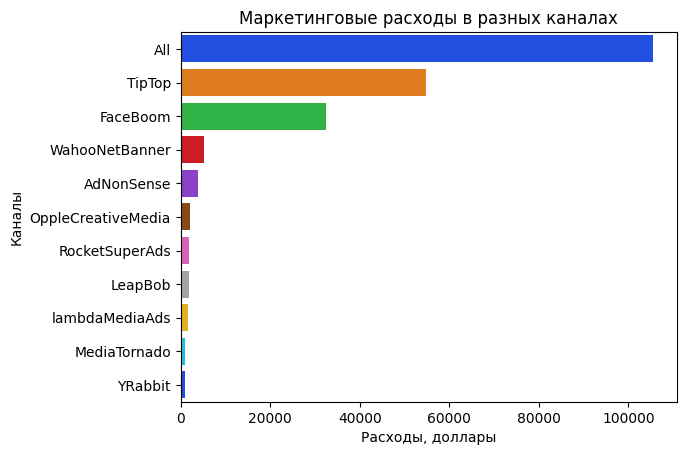

In [27]:
sns.barplot(y=cost_distr['channel'],x=cost_distr['costs'],palette='bright')
plt.title('Маркетинговые расходы в разных каналах');
plt.xlabel('Расходы, доллары')  
plt.ylabel('Каналы')
plt.show()

In [28]:
cost_distr.merge(payer_share_by_chanel,how='right', on='channel')\
                .merge(users_by_chanel,how='right', on='channel')[['channel','%','payer',True,'All']]\
                .rename(columns={'%':'Costs_share','payer':'Payers_share','All':'Users_attracted', True:'Payers_attracted'})\
                .sort_values(by='Payers_attracted', ascending=False).set_index('channel').drop('All')

Costs_share  Payers_share  Payers_attracted  \
channel                                                           
FaceBoom                   30.8      0.122049              3557   
TipTop                     51.9      0.096007              1878   
organic                     NaN      0.020553              1160   
WahooNetBanner              4.9      0.052964               453   
AdNonSense                  3.7      0.113402               440   
RocketSuperAds              1.7      0.079137               352   
LeapBob                     1.7      0.030633               262   
OppleCreativeMedia          2.0      0.027077               233   
lambdaMediaAds              1.5      0.104700               225   
YRabbit                     0.9      0.038265               165   
MediaTornado                0.9      0.035747               156   

                    Users_attracted  
channel                              
FaceBoom                      29144  
TipTop                        19561  
organic                       56439  
WahooNetBanner                 8553  
AdNonSense                     3880  
RocketSuperAds                 4448  
LeapBob                        8553  
OppleCreativeMedia             8605  
lambdaMediaAds                 2149  
YRabbit                        4312  
MediaTornado                   4364

**Вывод:** Больше всего средств было потрачено на каналы TipTop(54751-51,9%) и  FaceBoom(3244-30.8%5). Суммарно на остальные источники было потрачено 18300.4, что составляет 17,3%. меньше всего портачено на каналы MediaTornado и YRabbit.
Каналы которые находятся в числе лидеров по затратам, так же лидируют и по общему количеству пользователей. Самая высокая доля платящих в FaceBoom, далее идет AdNonSense, а затраты на него раположились на 4м месте (3,7) и не сравнимы с первыми двумя. Третий по доле источник lambdaMediaAds, среди затрат находится на 8м месте(1,7%).  
У TipTop колличество привлеченных платящих пользователей немногим больше, чем органических пользователей, хотя на него больше всего затрат. На FaceBoom потрачено меньше, но платящих пользователей в нем на порядок больше, чем в остальных каналах и даже больше, чем в каналах organic и TipTop вместе взятых.	

Построим визуализации динамики изменения расходов по неделям и  по месяцам для всех источников.

In [29]:
#добавление новых столбцов в датафрейм для более удобного использования
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head(3)

dt   channel  costs  week  month
0  2019-05-01  FaceBoom  113.3    18      5
1  2019-05-02  FaceBoom   78.1    18      5
2  2019-05-03  FaceBoom   85.8    18      5

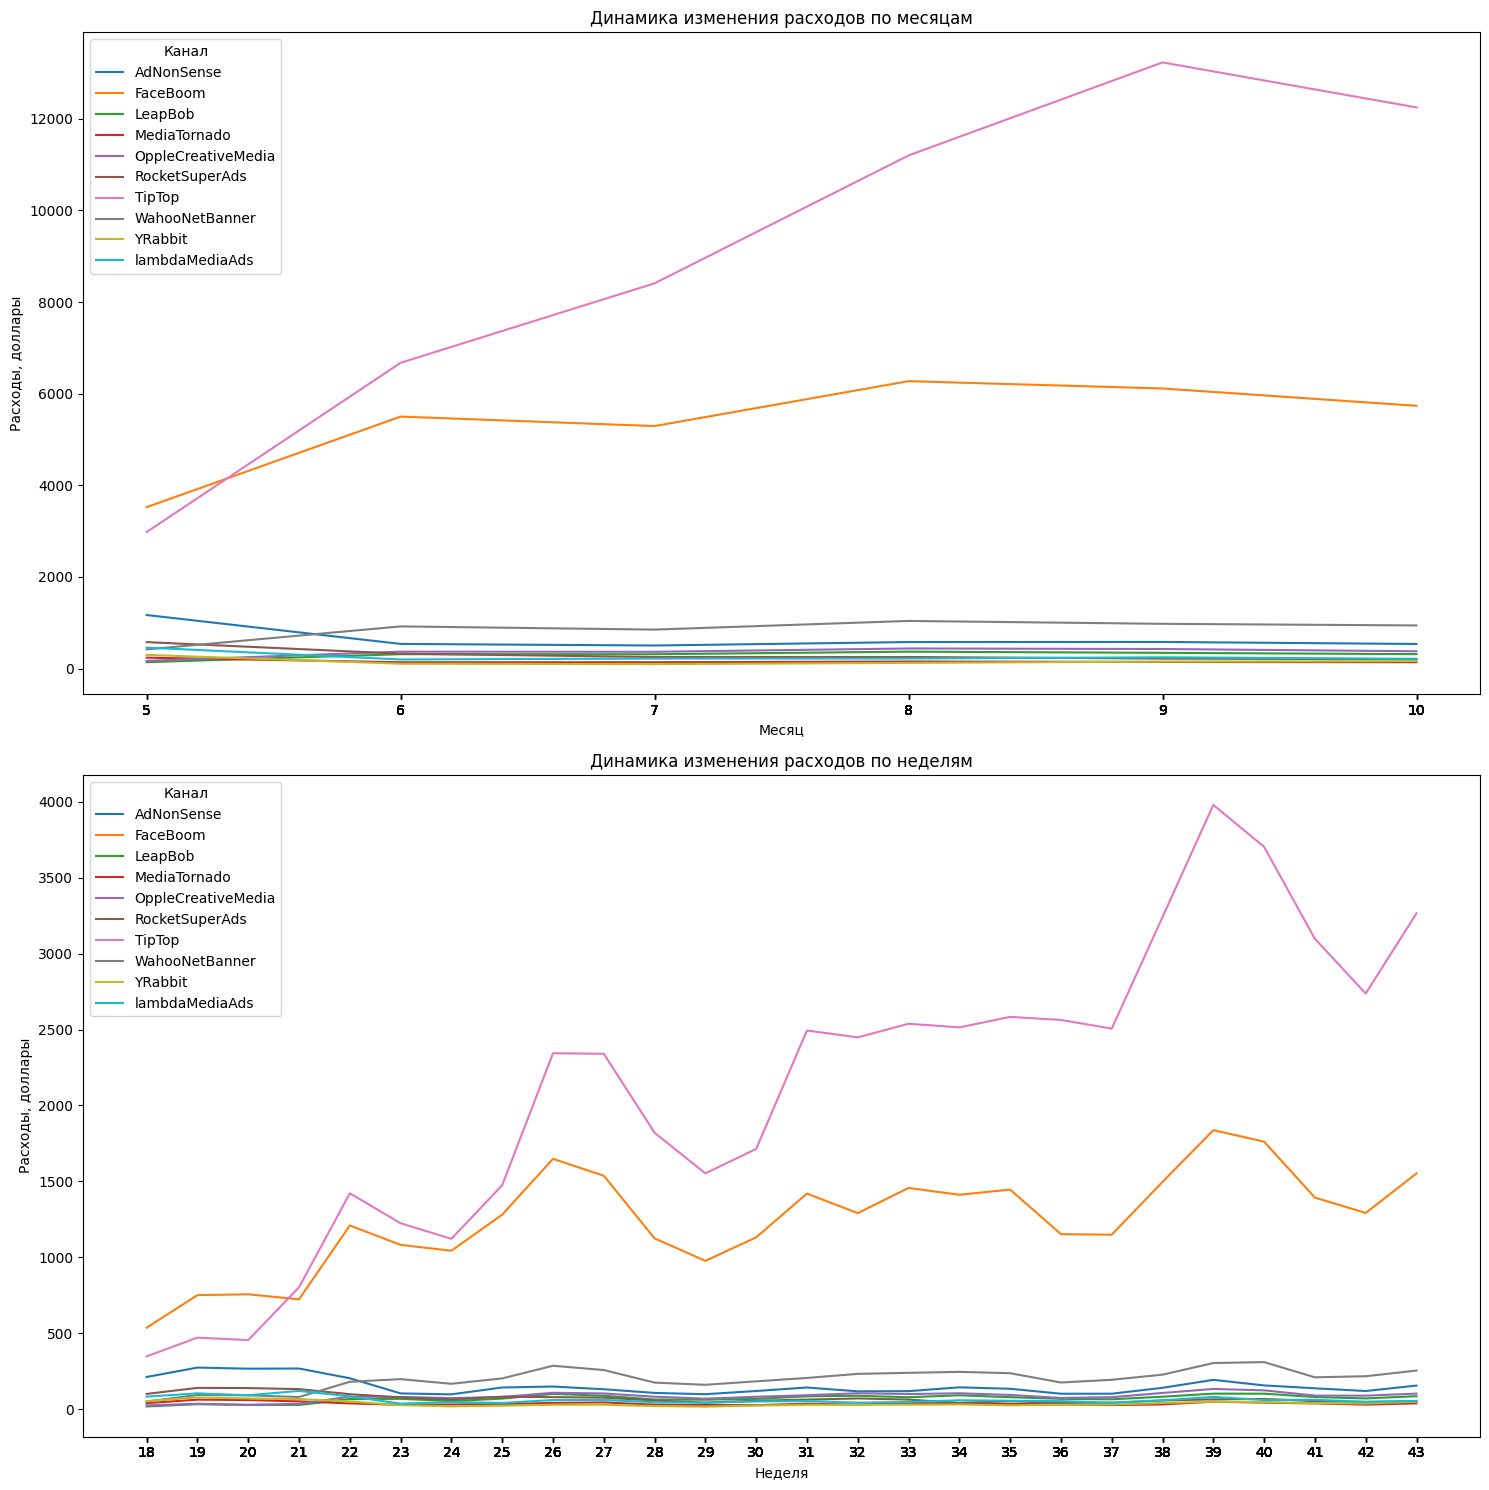

In [30]:
#агрегаяция данных и построение графика для расходов по месяцам
monthly_costs_by_channel = costs.groupby(['month', 'channel'])['costs'].sum().reset_index()
#агрегаяция данных и построение графика для расходов по неделям
weekly_costs_by_channel = costs.groupby(['week', 'channel'])['costs'].sum().reset_index()

plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
sns.lineplot(data=monthly_costs_by_channel, x='month', y='costs', hue='channel')
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, доллары')
plt.legend(title='Канал')
plt.xticks(ticks=monthly_costs_by_channel['month'])

plt.subplot(2,1,2)
sns.lineplot(data=weekly_costs_by_channel, x='week', y='costs', hue='channel')
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, доллары')
plt.legend(title='Канал')
plt.xticks(ticks=weekly_costs_by_channel['week'])

plt.tight_layout() 
plt.show()

**Вывод:** График изменения стоимости по месяцам выглядит сглаженно, но даже из него очевидно, что расходы на канал FaceBoom выросли в сравнении с остальными источниками, а расходы на канал TipTop сделали несколько скачков во много раз. Остальные источники подавляются расходами лидеров.
На графике по неделям отчетливо видны изменения затрат, причем для лидеров расходы растут скачками в течении рассматриваемого периода, с минимумом в 18 неделю, максимумом в 39 неделю и продолжают возрастать на последнию неделю в данных. Для FaceBoom расходовы возрасли примерно в 3 раза, для TipTop - в 10. Для остальных источников расходы имеют свойство незначительно изменяться в теже преиоды, но не с такой интенсивностью.

In [31]:
weekly_costs_by_channel.query('week in (18,39) and channel in ("TipTop","FaceBoom")')[['channel','costs']]\
                        .sort_values(by='channel').set_index('channel').T

channel  FaceBoom  FaceBoom  TipTop  TipTop
costs       535.7    1837.0   347.0  3979.5

Посмотрим на те же графики, исключив лидеров.

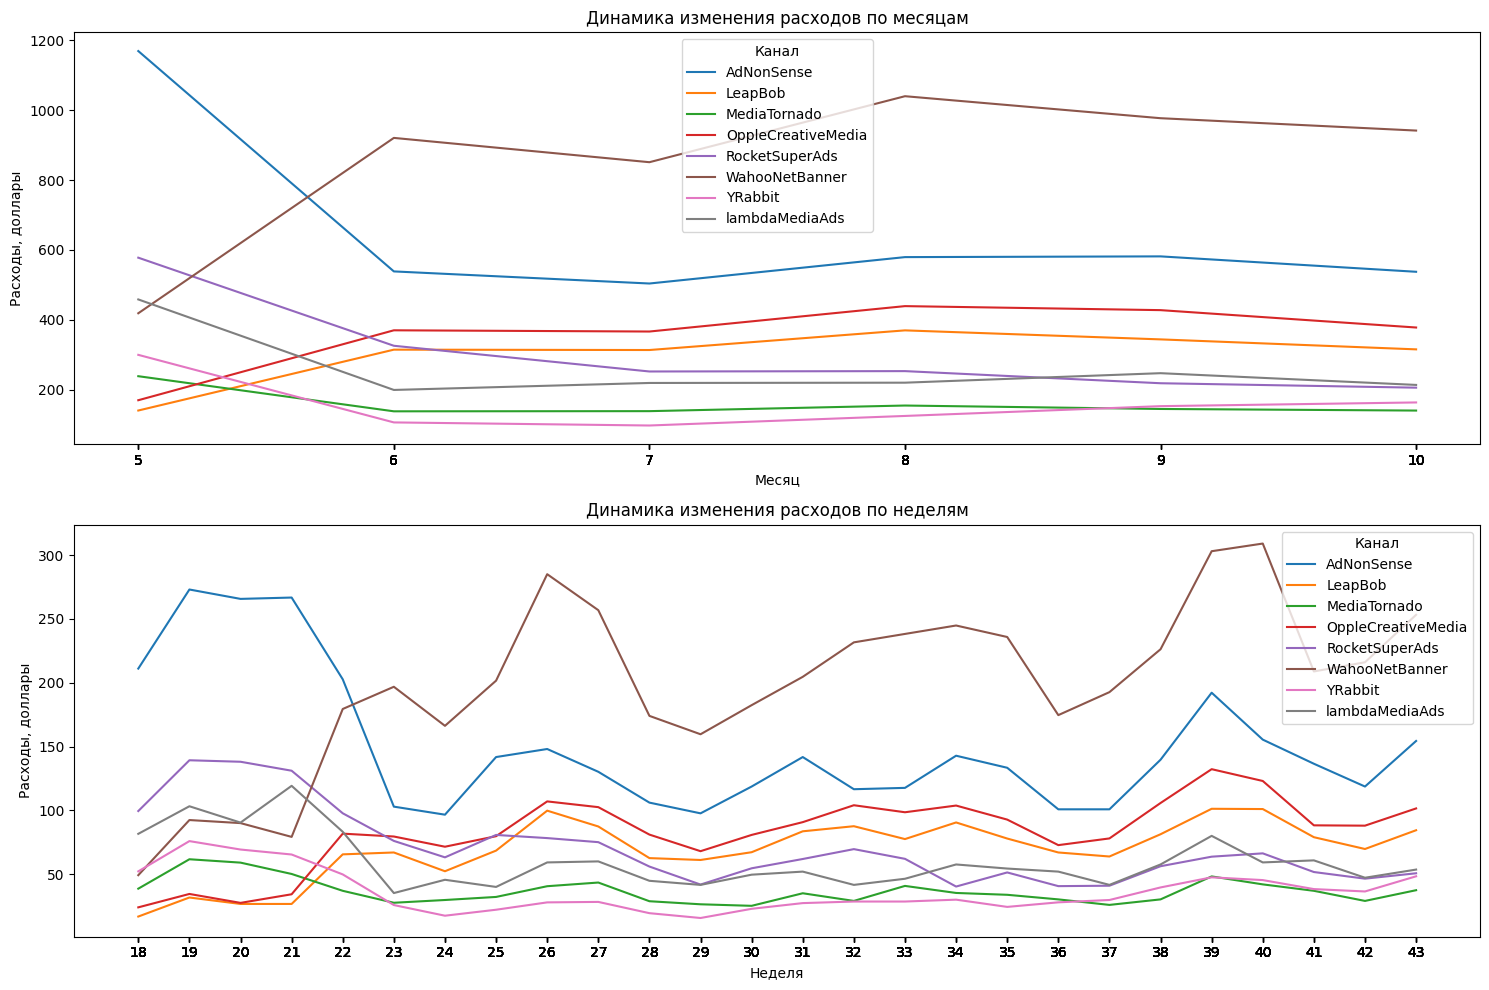

In [32]:
monthly_costs_by_channel_wo_l=monthly_costs_by_channel.query('channel not in ("FaceBoom","TipTop")')
weekly_costs_by_channel_wo_l=weekly_costs_by_channel.query('channel not in ("FaceBoom","TipTop")')
plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
sns.lineplot(data=monthly_costs_by_channel_wo_l, x='month', y='costs', hue='channel')
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, доллары')
plt.legend(title='Канал')
plt.xticks(ticks=monthly_costs_by_channel['month'])

plt.subplot(2,1,2)
sns.lineplot(data=weekly_costs_by_channel_wo_l, x='week', y='costs', hue='channel')
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, доллары')
plt.legend(title='Канал')
plt.xticks(ticks=weekly_costs_by_channel['week'])

plt.tight_layout() 
plt.show()

На графике по месяцам выделяются два лидера среди условно "малых" каналов, где у одного наблюдается рост в 2 раза,а у другого падение.
На графике по неделям, мы можем видеть, что флуктуации так же характерны для малых как и для лидеров, но максимумы не доходят до 350 долларов.  
Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [33]:
profiles.query('channel != "organic"')[['user_id', 'acquisition_cost','channel']].\
         groupby('channel').agg({'acquisition_cost': 'mean'}).\
         rename(columns={'acquisition_cost': 'cac'}).round(2).sort_values('cac', ascending=False).reset_index()

channel   cac
0              TipTop  2.80
1            FaceBoom  1.11
2          AdNonSense  1.01
3      lambdaMediaAds  0.72
4      WahooNetBanner  0.60
5      RocketSuperAds  0.41
6  OppleCreativeMedia  0.25
7        MediaTornado  0.22
8             YRabbit  0.22
9             LeapBob  0.21

**Вывод:** Самыми дорогими источниками оказались теже источники на которые мы потратили больше всего средств - TipTop и FaceBoom. AdNonSense сравним по смоимости с FaceBoom. В 5ке лидеров так же - lambdaMediaAds и WahooNetBanne. Самый дешевый источник - LeapBob. Примерно на таком же уровне находится и стоимость остальных 3х замыкающих этого рейтинга.

### 3.3. Окупаемость рекламы

Далее будем рассматривать окупаемость рекламы, для этого исключим "бесплатных" пользователей, т.е. пришедших через органический канал.

In [34]:
profiles_p=profiles.query('channel != "organic"')

Воспользуемся ранее объявленной функцией - рассчитаем LTV, ROI и CAC, затем выведем графики.

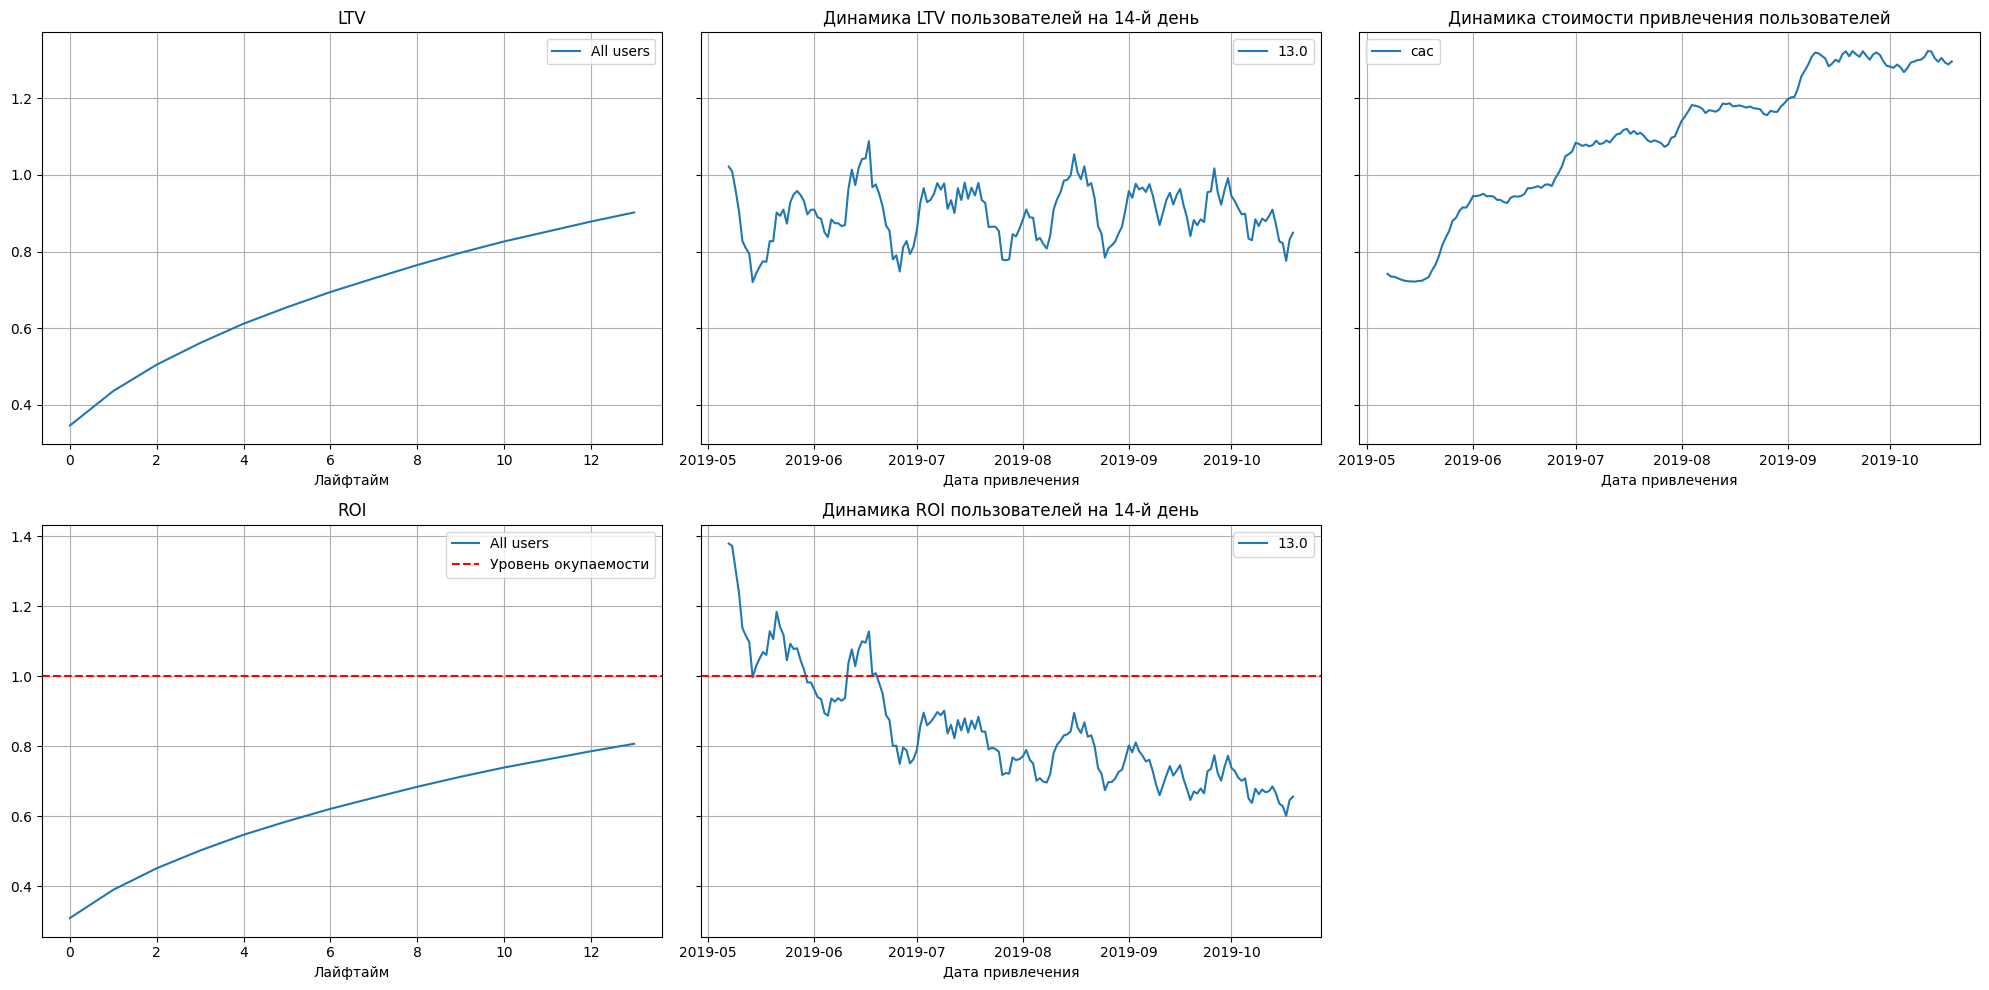

cohort_size   cac   0.0   1.0   2.0  3.0   4.0   5.0   6.0   7.0  \
cohort                                                                        
All users        88644  1.12  0.31  0.39  0.45  0.5  0.55  0.59  0.62  0.65   

            8.0   9.0  10.0  11.0  12.0  13.0  
cohort                                         
All users  0.68  0.71  0.74  0.76  0.79  0.81

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p,orders,observation_date,horizon_days,dimensions=[],ignore_horizon=False,)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
roi_grouped.round(2)

На графиках мы видим, что:  
LTV растет, но не доходит до единицы за 14 дней.  
Динамика LTV варьируется в диапозоне от 0,8 до 1 с небольшим снижением амплитуды к концу периода.  
Динамика стоимости привлечения растет, судя по графику минимум в 2 раза.  
ROI не дошел до 1, остановившись на 4 день около 0,8, соответсвенно реклама не окупается за требуемый период.   
Если судить по динамике, то первые проблемсы начались еще в начале июня, потом было кратовременное возвращение к окупаемости, а с конца июня окупаемость стабильно ниже 1.   

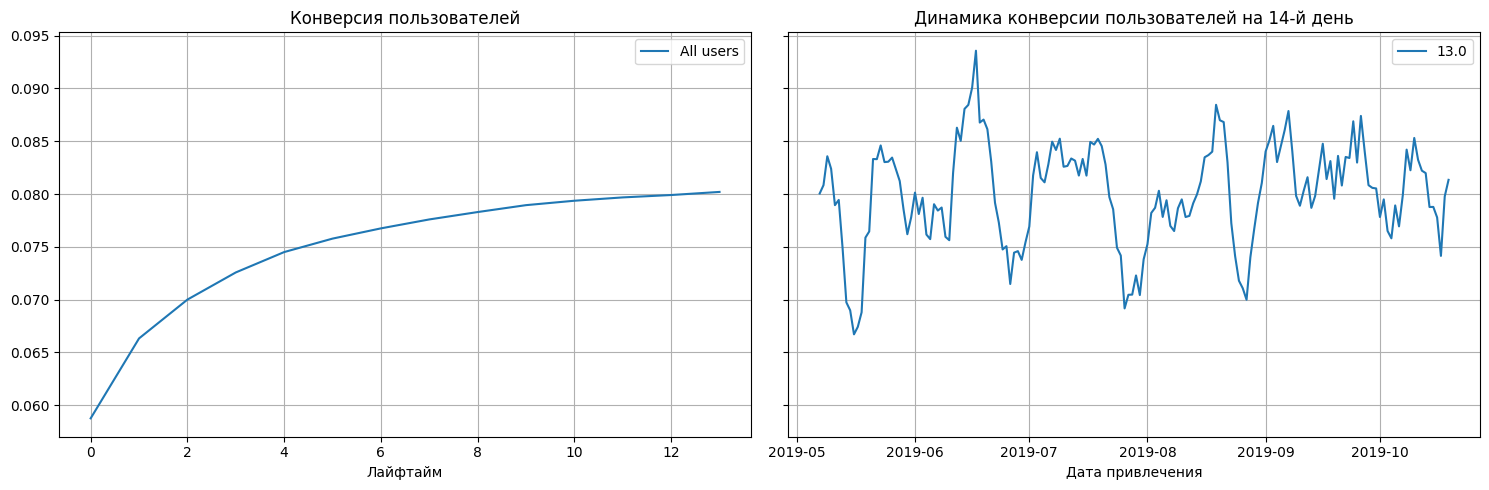

In [36]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_p,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

На графиках  мы видим, что пользователи хорошо конвертируются и на 14 день этот показатель достигает  чуть выше 0,8 - что является хорошим уровнем, если ориентироваться на бенчмарки в открытых источниках.  
Динамика конверсии показывает спад в мае, и повторяющимися спады в конце летних месяцев, а осенью график более стабильный, можно предположить сезонное влияние.

Рассмотрим удержание пользователей.

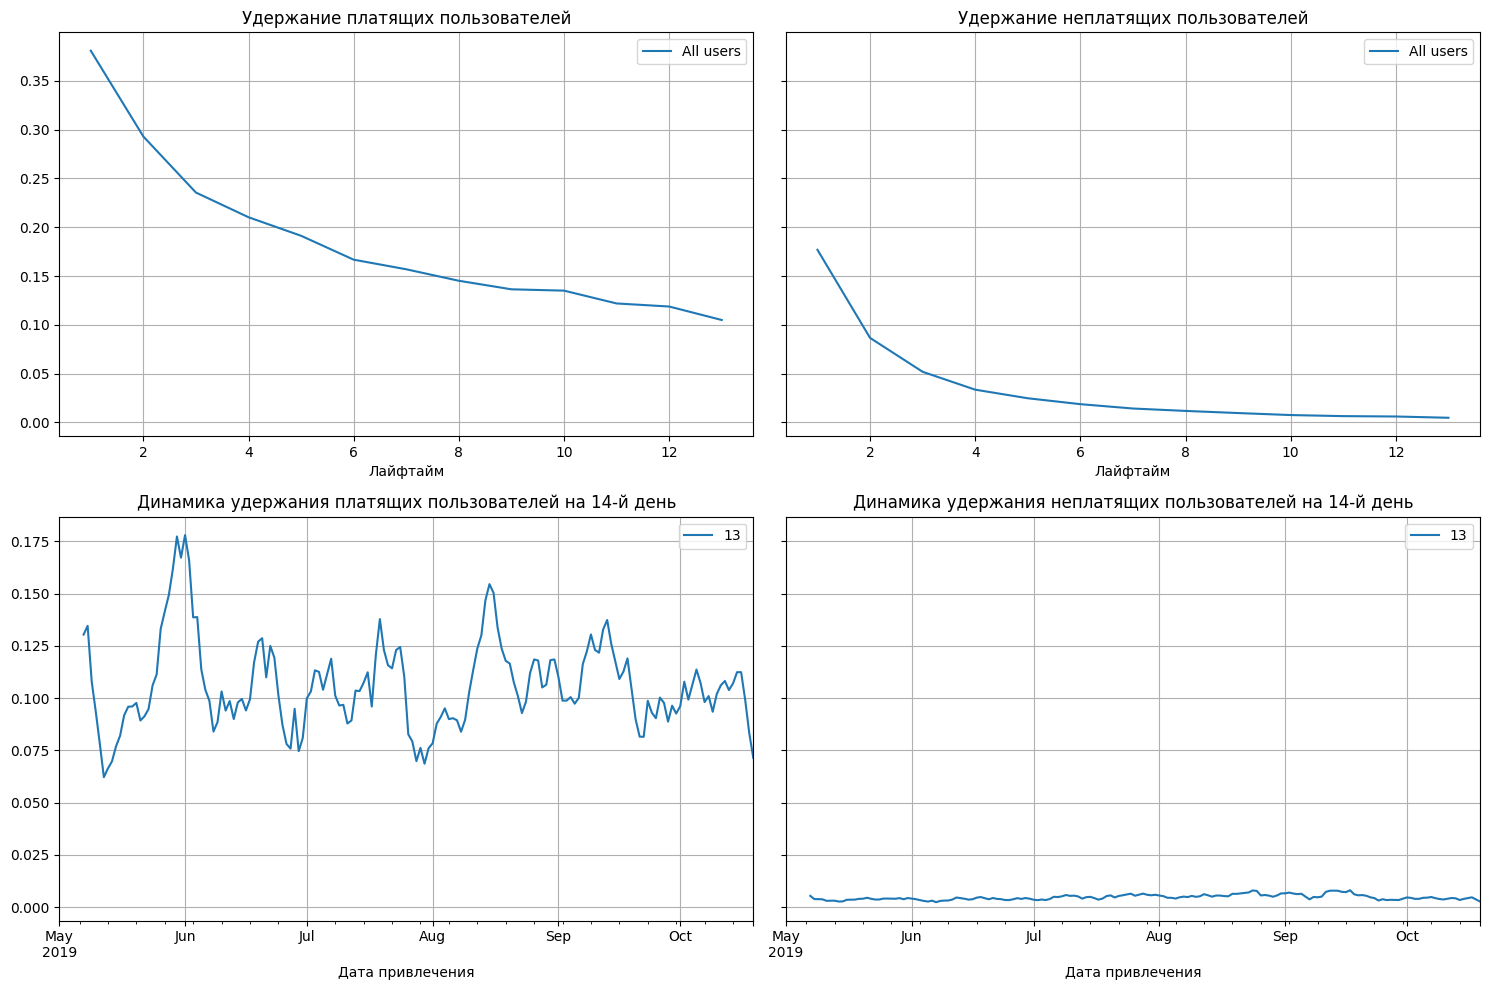

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        81334  1.0  0.176876  0.086594  0.051823  0.033504  0.024701   
True          7310  1.0  0.380985  0.293023  0.235568  0.210260  0.191245   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018651  0.014188  0.011729  0.009541  0.007488  0.006393  0.006012   
True   0.166758  0.156908  0.145144  0.136389  0.135021  0.121888  0.118741   

             13  
payer            
False  0.004709  
True   0.104925

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_p,visits,observation_date,horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days, window=7)
retention_grouped

На графиках видим что:  
У платящих удержание выше и когорта по размеру меньше - как и должно быть, в конце 2х недель удержание около 10%, т.е. пользователи всё еще используют приложение.   
Для неплатящих удержание стремится к нулю на 14 день, динамика благодаря этому почти ровня, с небольшими колебаниями.  
На графике динамики мы видим, что для платящих есть сезонность спроса, тк есть несколько пиков и падений в мае и августе.   

По рассматриваемым данным можно сказать, что удержание не "провалилось" и не является причиной финансовых потерь.   

**Вывод:**  
Мы рассмотрели показетил в общем. По графикам можно предположить, что падение прибыли связано с повысившейся стоимостью рекламы,  что коррелирует с возрастающими затратами на самый дорогой источник. Если бы стоимость привлечения(CAC) была на таком же уровне как ранее, то при стабильно растущем LTV, ROI мог бы дойти до единицы, то есть окупиться. Стоит более детально раасмотреть данные LTV, CAC и ROI в разрезе платформ, регионов и устройств, прежде чем делать окончательные выводы.

#### Регионы

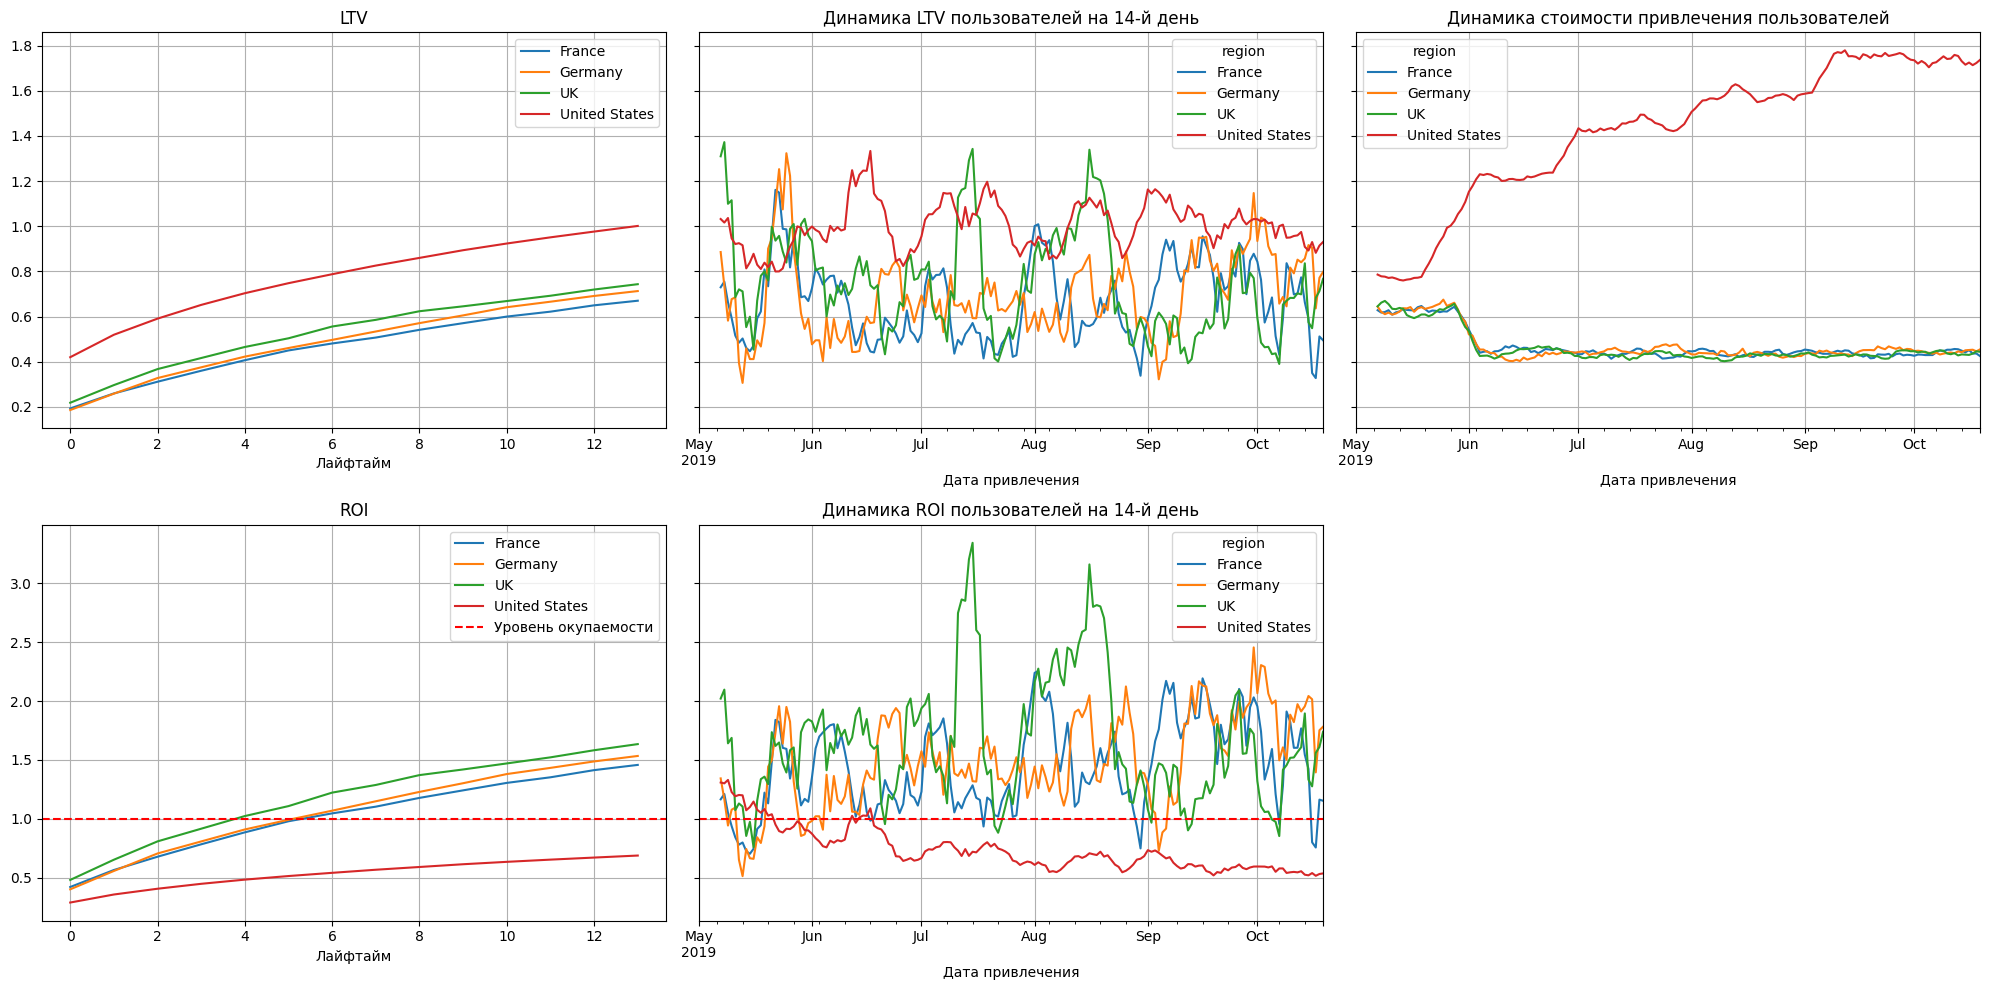

cohort_size   cac   0.0   1.0   2.0   3.0   4.0   5.0   6.0  \
region                                                                       
France               10516  0.46  0.42  0.56  0.68  0.78  0.88  0.98  1.05   
Germany               9030  0.46  0.40  0.56  0.71  0.81  0.91  0.99  1.07   
UK                   10536  0.45  0.48  0.65  0.81  0.92  1.02  1.11  1.22   
United States        58562  1.46  0.29  0.36  0.41  0.45  0.48  0.51  0.54   

                7.0   8.0   9.0  10.0  11.0  12.0  13.0  
region                                                   
France         1.10  1.18  1.24  1.30  1.35  1.41  1.46  
Germany        1.15  1.23  1.30  1.38  1.43  1.49  1.53  
UK             1.29  1.37  1.42  1.47  1.52  1.58  1.63  
United States  0.57  0.59  0.61  0.63  0.65  0.67  0.69

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p,orders,observation_date,horizon_days,dimensions=['region'],ignore_horizon=False,)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
roi_grouped.round(2)

На графиках по регионам выделяется US, отмечен красным:  
LTV наибольший с отрывом от остальных, динамика стабильная с периодами спада и подъема, стоимость - сильно возросла  с мая по октябрь, в динамике ROI - не окапуается с момент возросшей стоимости.  
Остальные три страны на графиках ведут себя похоже:  
у всех трёх платформ LTV несколько ниже в динамике чем у US, но окупаются они сильно лучше, одновременно с подорожанием в США, в остальных странах наблюдаем удешевление.   
Из тройки можно выделить UK: в динамика LVT имеет большую амплитуду, ROI и его динамика выше остальных.   

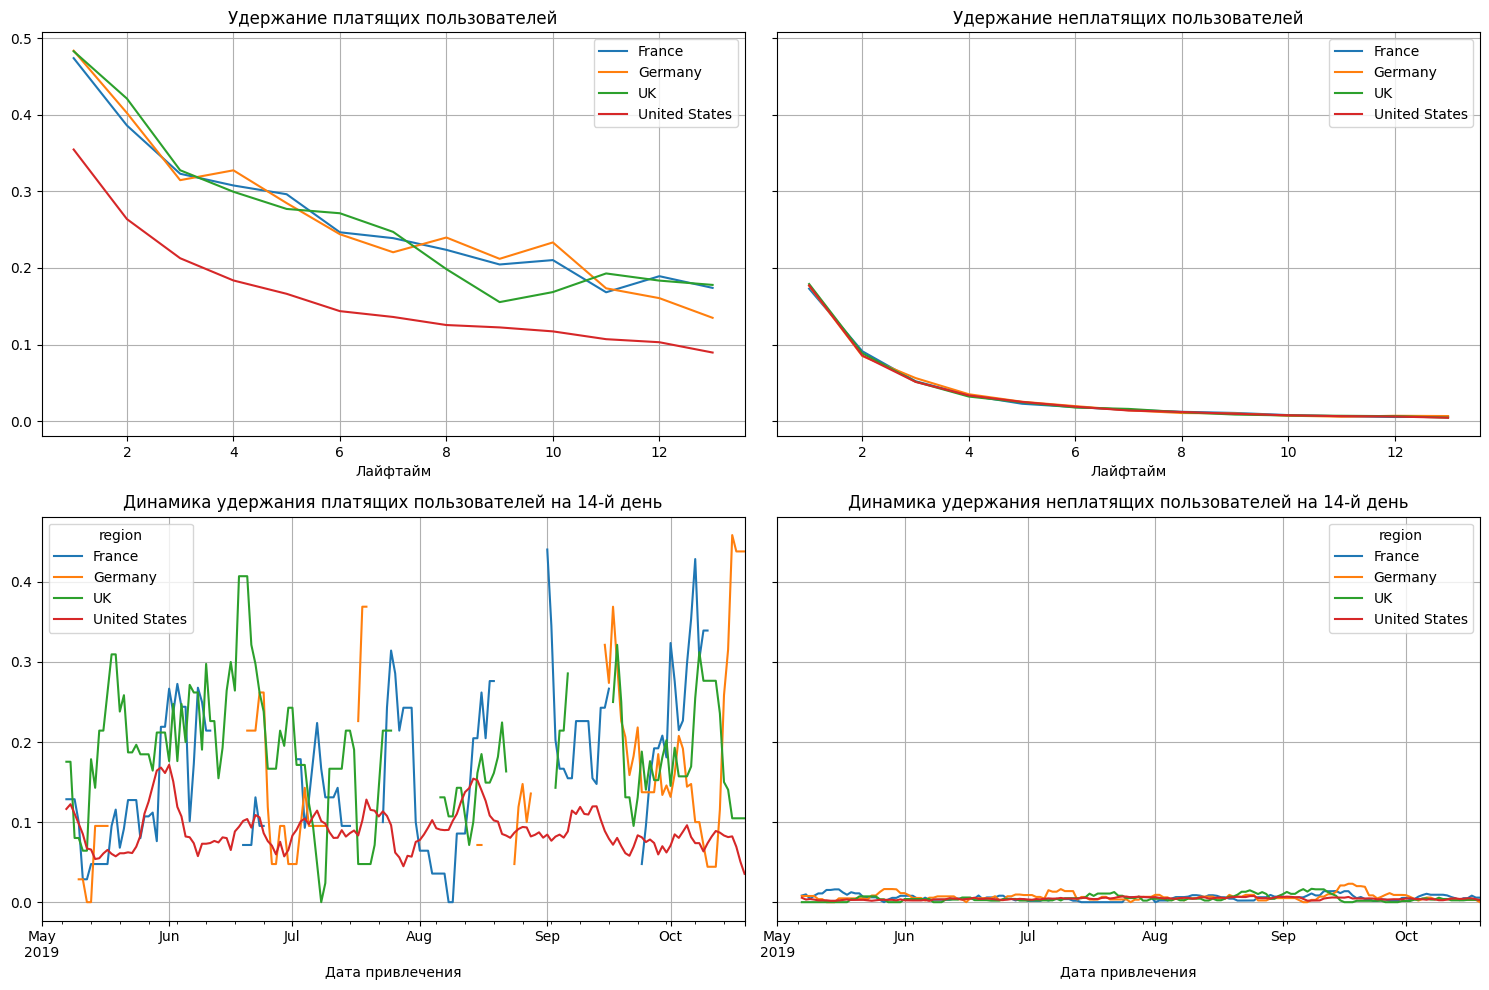

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_p,visits,observation_date,horizon_days,dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

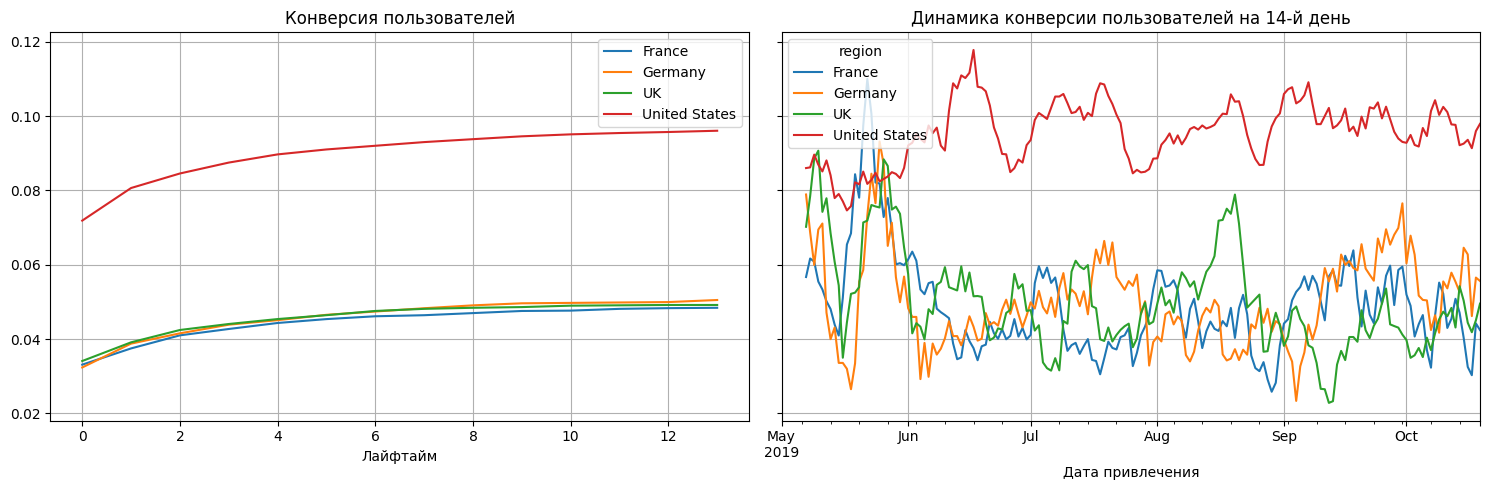

In [40]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_p,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Конверсия в США сильно выше, чем в остальных регионах, почти 10% в конце периода, в остальных - около 5%, при среднем 8%. США смешает среднее, уменьшив долю этого источника, общая конверсия может существенно уменьшится, при этом в США самое низкое удержание, это говорит нам о высокой конкуренции на рынке или неподходящей стратегии удержания для ЦА. 
В динамике конверсии в США растут, а в остальных регионах снижается, с значительным провалом в середине мая. 
На грфике удержания мы можем так же видеть, что кривые для всех ригионов кроме США прерываюся, это означает что у нас нет данных, что может быть ошибкой сбора данных иди отсутвие активности пользователей в определенные периоды, можно сказать что есть сезонность, тк графики прерывисты в основном в летнее время. Примечательно что удержание неплатящих польззователей в Германии выше чем в других регонах, а к концу 14 дней для платящих пользователей наблюдается падение больше чем в других регионах, но меньше чем в США.

#### Устройства

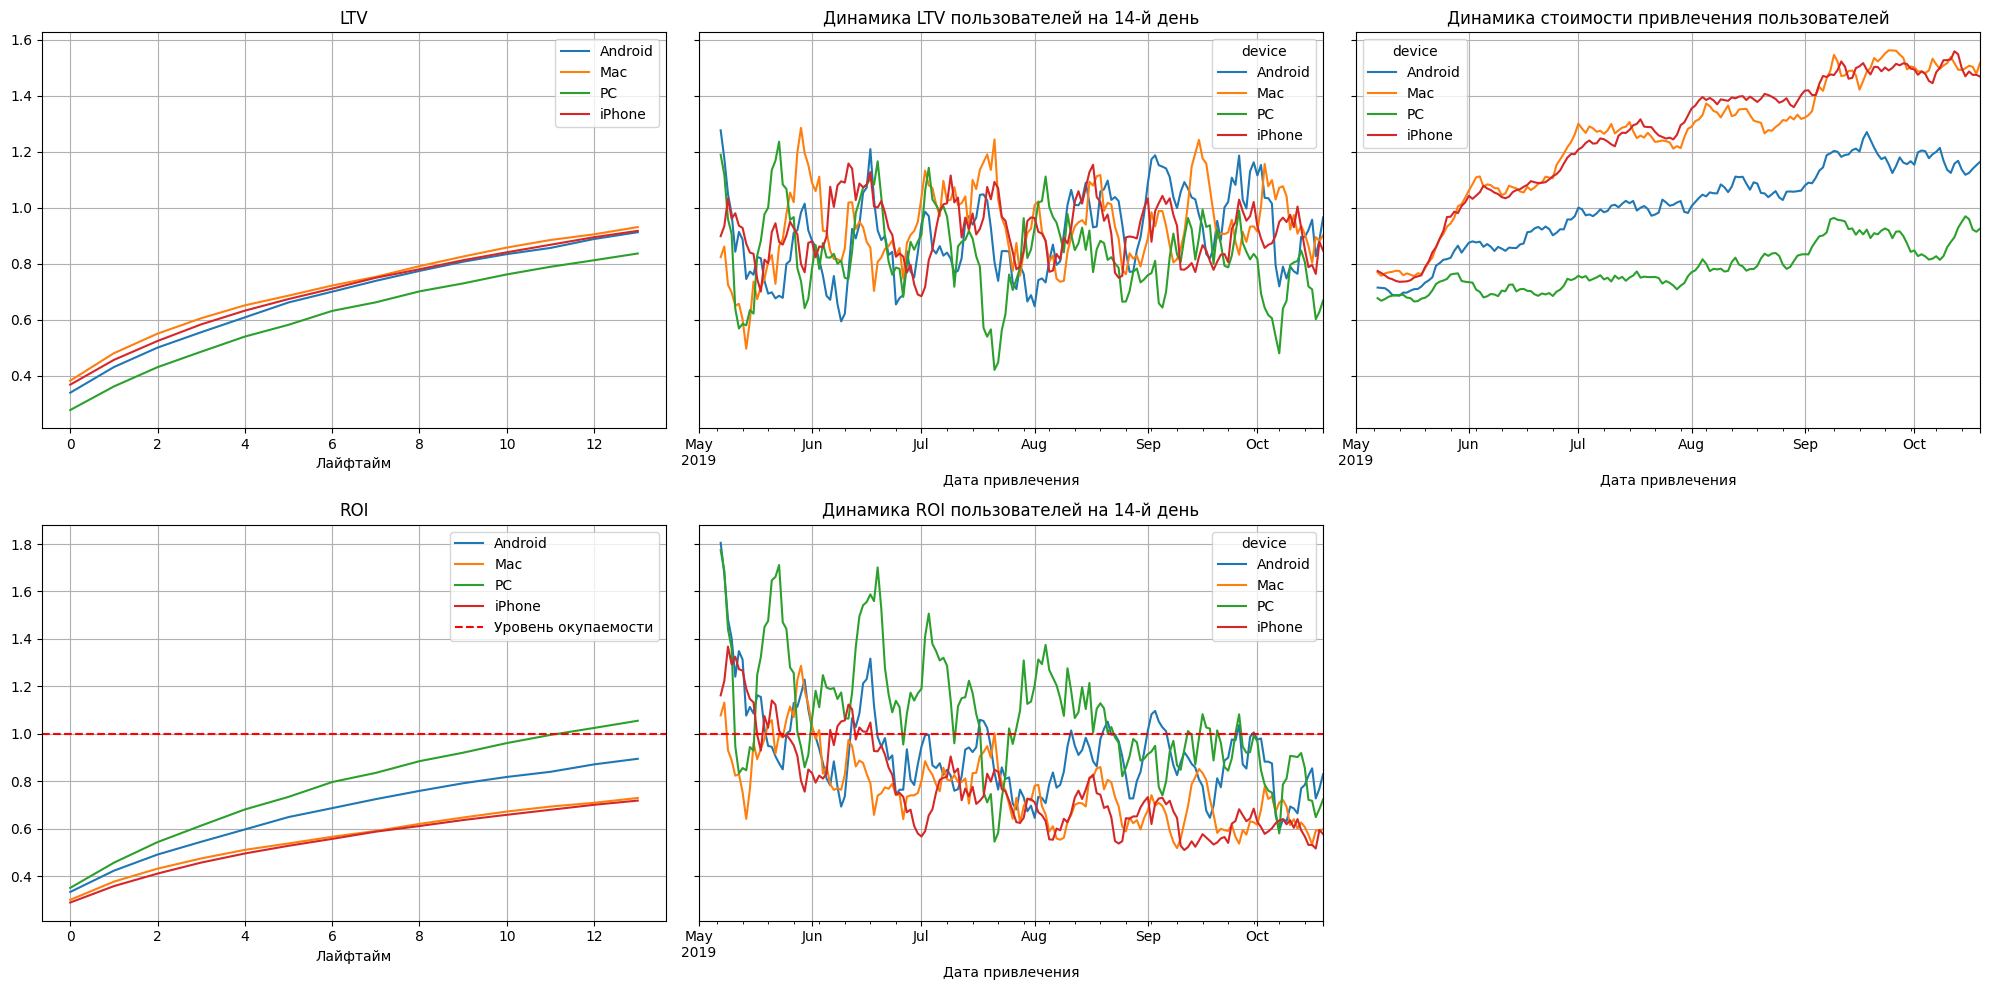

cohort_size   cac   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0  \
device                                                                       
Android        20683  1.02  0.33  0.42  0.49  0.54  0.60  0.65  0.69  0.72   
Mac            17747  1.28  0.30  0.38  0.43  0.47  0.51  0.54  0.57  0.59   
PC             18128  0.79  0.35  0.46  0.54  0.61  0.68  0.73  0.80  0.84   
iPhone         32086  1.28  0.29  0.36  0.41  0.46  0.50  0.53  0.56  0.59   

          8.0   9.0  10.0  11.0  12.0  13.0  
device                                       
Android  0.76  0.79  0.82  0.84  0.87  0.89  
Mac      0.62  0.65  0.67  0.69  0.71  0.73  
PC       0.88  0.92  0.96  0.99  1.02  1.05  
iPhone   0.61  0.64  0.66  0.68  0.70  0.72

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p,orders,observation_date,horizon_days,dimensions=['device'],ignore_horizon=False,)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
roi_grouped.round(2)

На графиках по девайсам мы видим что:  
Подорожали все платформы, первое место делят устройства Apple, 2- Android, 3- PC, с наименьшим, но всё же ростом в периоде май-ноябрь.  
Соответственно в мае все платформы еще окупались(ROI), значительно только PC, к ноябрю реклама ни на одном девайсе не окупается.  
LTV у всех ниже 1, ниже всех PC, выше устройства Apple, почти там же Android.  
ROI только у PC на 14 день выше 1.  

Так же рассмотрим и конверсию и удержание по девайсам.

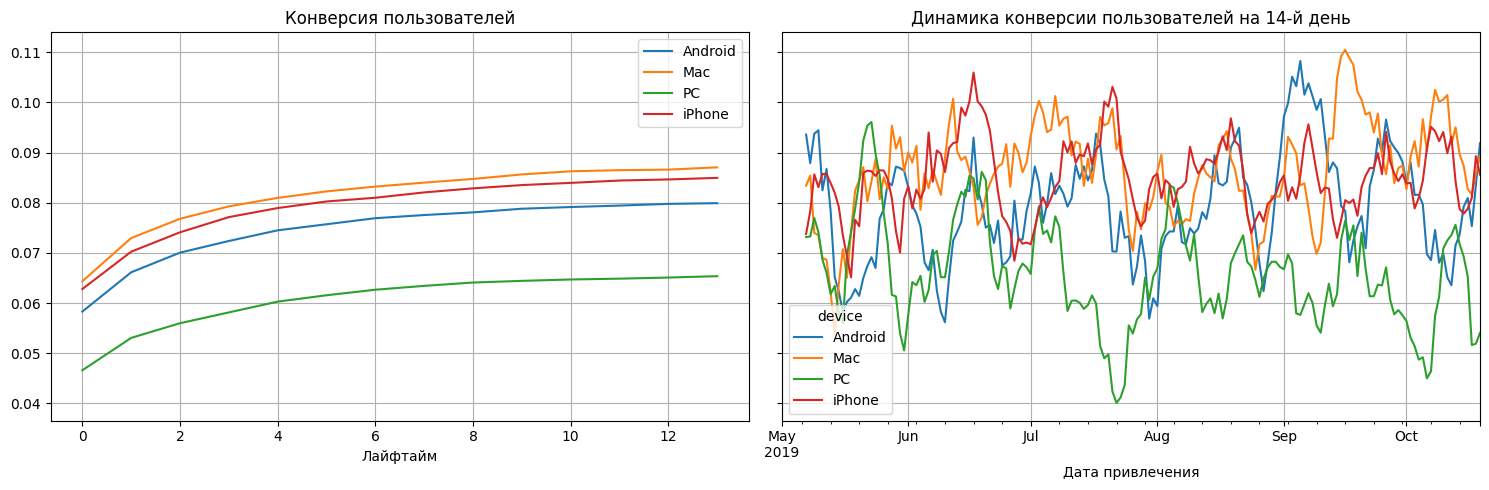

In [42]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_p,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

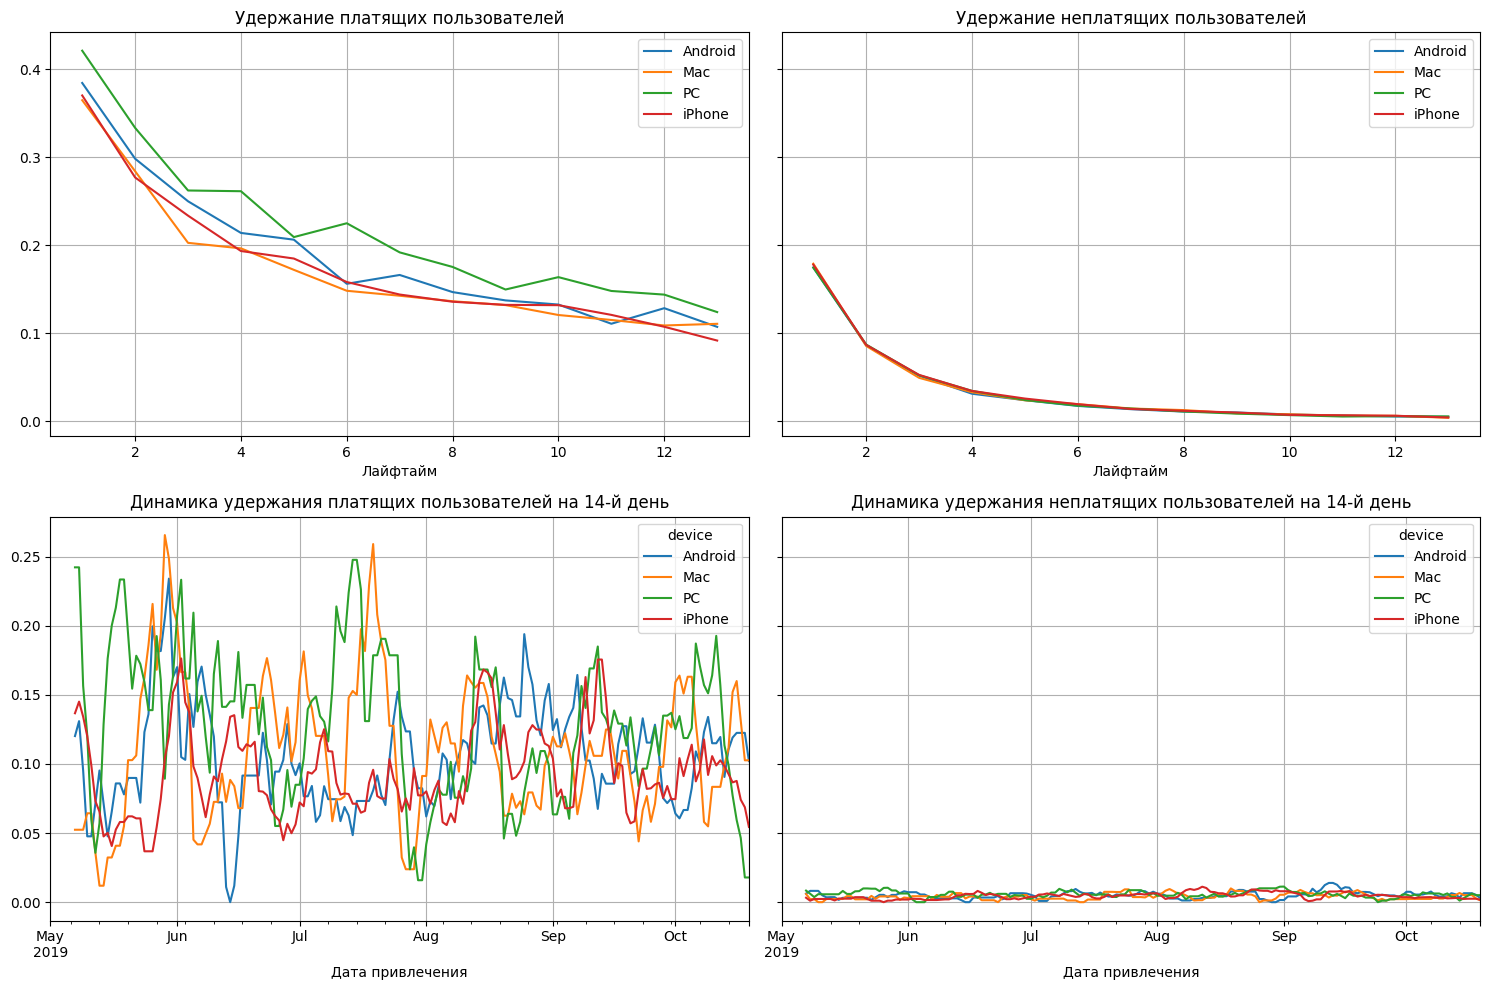

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_p,visits,observation_date,horizon_days,dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

На графиках конверсии в динамике мы видем очень большую волатильность, особенно для канала PC и она продолжает снижаться.
В среднем конверсия у  PC самая низкая,  далее - Android, Iphone и выше всех Mac.  
Получается интеерсная картина,  наименее конвертируемый канал - единственный который окупается, в тоже время LTV тоже самый низкий. При этом по графику ужержания платящих пользователей, видим, что самой лояльной аудиторией к концу периода являются пользователи PC и Mac, а наименее лояльная iphone. График динамики очень изменчивый для всех девайсов, но держится примерно в одно диапозоне.

#### Платформы

Если потспотсроить графики только по 10 каналам, то сложно будет анализировать динамику.  
Поскольку мы видели, что разбивка по устройствам не дала явных аутсайдеров, то сгрупируем данные roi по региону и каналу.
Проверим можно ли построить отдельные графики по каким-либо регионам.

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p,orders,observation_date,horizon_days,dimensions=['region','channel'],ignore_horizon=False,)

In [45]:
roi_by_region_roi_channel = roi_grouped.reset_index()[['channel','region','cohort_size','cac']]
roi_by_region_roi_channel

channel         region  cohort_size       cac
0           AdNonSense         France         1305  1.007541
1              LeapBob         France         2839  0.210026
2   OppleCreativeMedia         France         2830  0.249787
3       WahooNetBanner         France         2834  0.601841
4       lambdaMediaAds         France          708  0.723191
5           AdNonSense        Germany         1160  1.008427
6              LeapBob        Germany         2378  0.210179
7   OppleCreativeMedia        Germany         2431  0.250013
8       WahooNetBanner        Germany         2439  0.601801
9       lambdaMediaAds        Germany          622  0.728097
10          AdNonSense             UK         1237  1.008151
11             LeapBob             UK         2886  0.209827
12  OppleCreativeMedia             UK         2878  0.249938
13      WahooNetBanner             UK         2809  0.601918
14      lambdaMediaAds             UK          726  0.730447
15            FaceBoom  United States        27544  1.113419
16        MediaTornado  United States         4167  0.219035
17      RocketSuperAds  United States         4251  0.417431
18              TipTop  United States        18498  2.757774
19             YRabbit  United States         4102  0.217087

По таблице выше можно заключить, что в US одни каналы, а в остальных регионах другие. Посмотрим на каждый отдельно.

In [46]:
profiles_p_US=profiles_p.query('region == "United States"')
profiles_p_EU=profiles_p.query('region != "United States"')

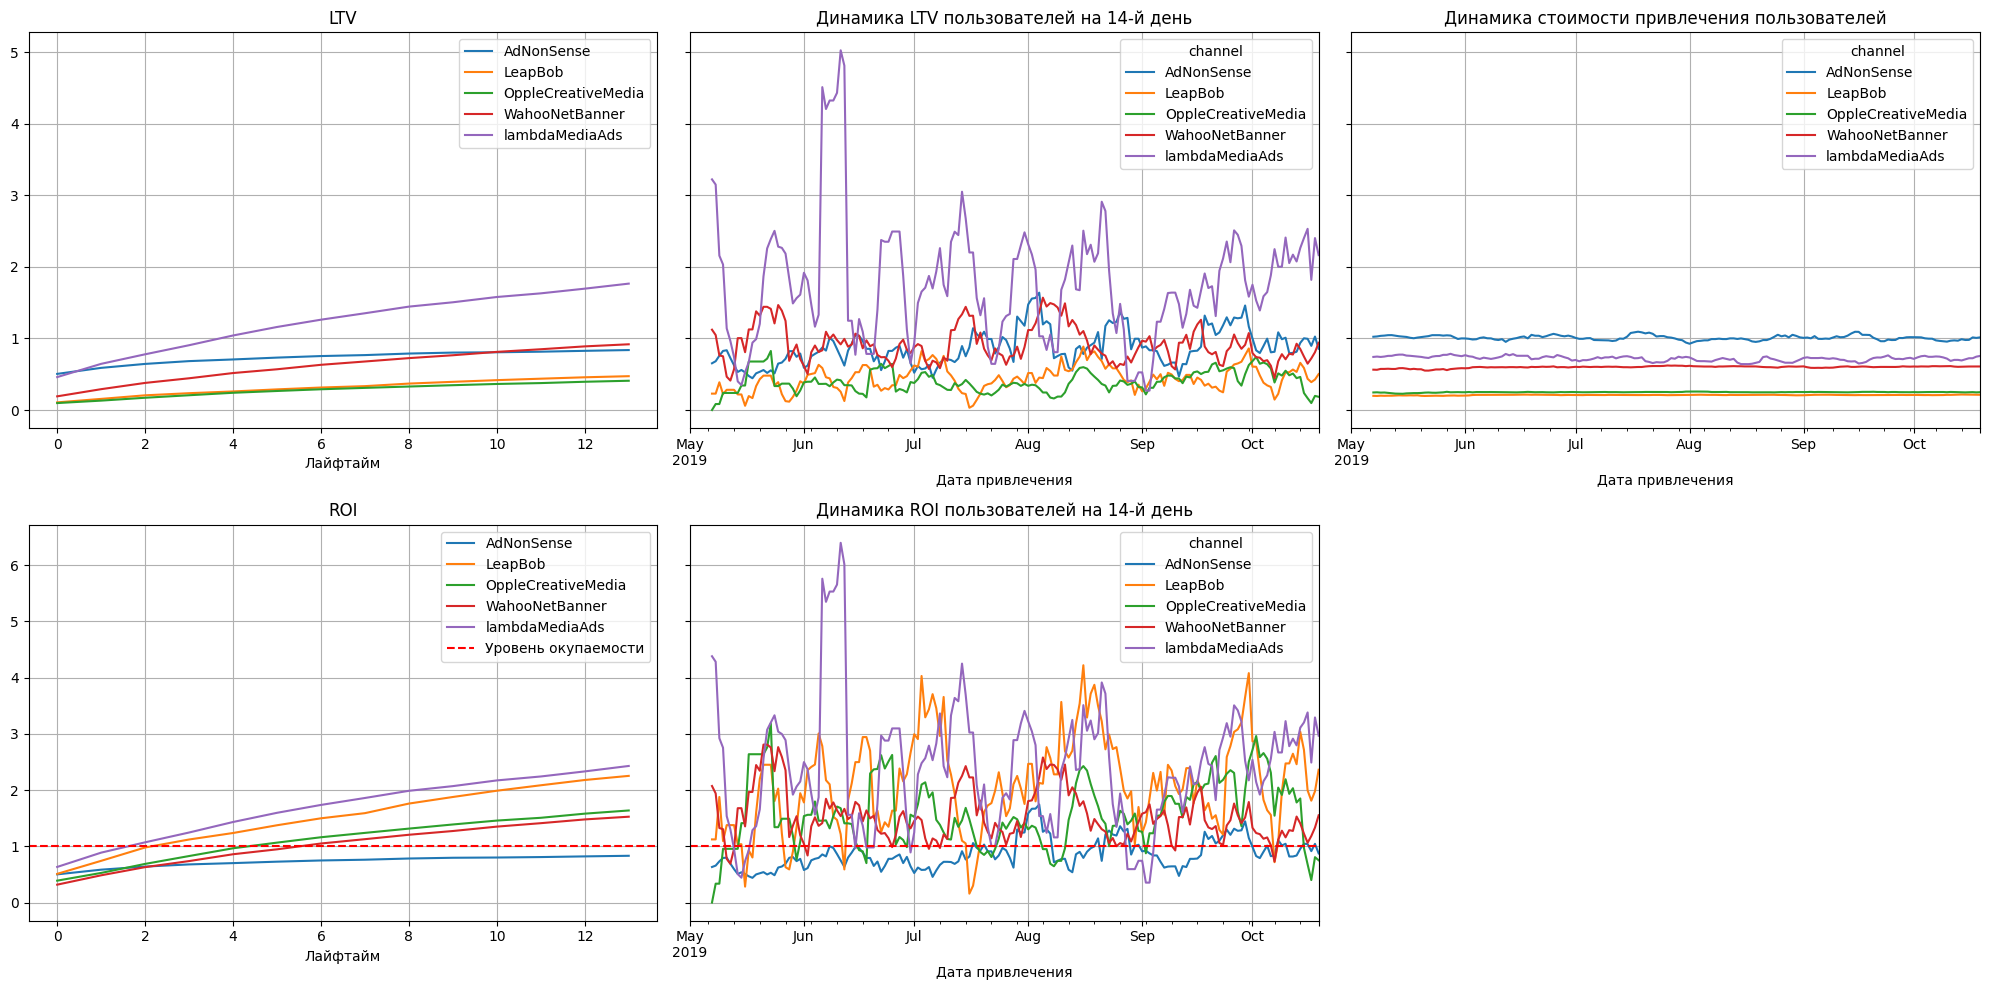

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p_EU,orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False,)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

На графиках для европы мы видим:   
Не окупается реклама у AdNonSense, умеренно окупается у OppleCreativeMedia и WahooNetBanner, лучше всех окупается у lambdaMediaAds и LeapBob.  
По динамике стоимости видим, что у LeapBob самая низкая стоимость привлечения, а LTV такой же как у OppleCreativeMedia, с чем и связана быстрая окупаемость.  

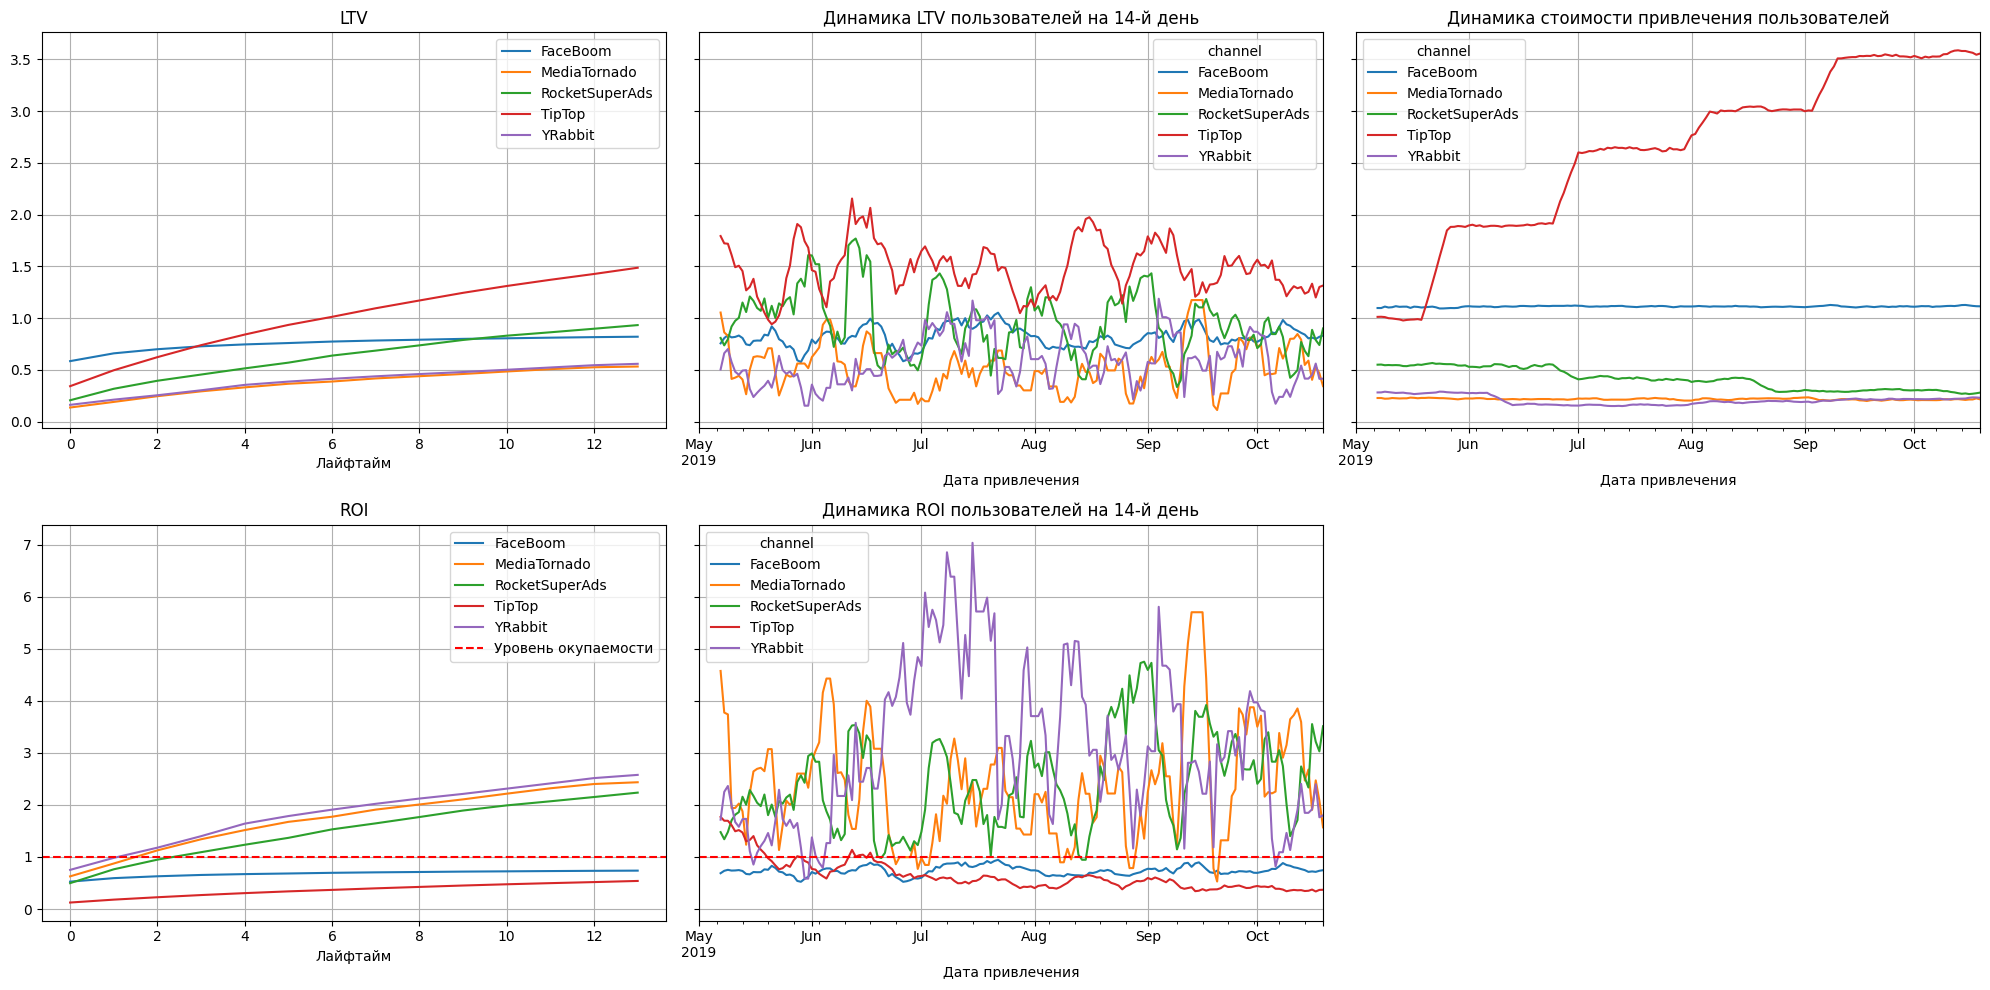

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history, = get_ltv(
    profiles_p_US,orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False,)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Для США на графиках видим:   
Не окупаются еще с середины мая FaceBoom и TipTop, хотя стоимость была выше всех и остаётся, а у TipTop даже выросла в много раз и при этом являются наиболее дорогими в CAC.
LTV самый высокий у TipTop, самый низкий - MediaTornado и YRabbit. ROI высокий YRabbit, MediaTornado, RocketSuperAds, а в динамике лидирует RocketSuperAds.
Для США явно пора пересмотреть основные каналы привлечения. 

Для двух укрёпнённых регионов так же посмотрим удержание.

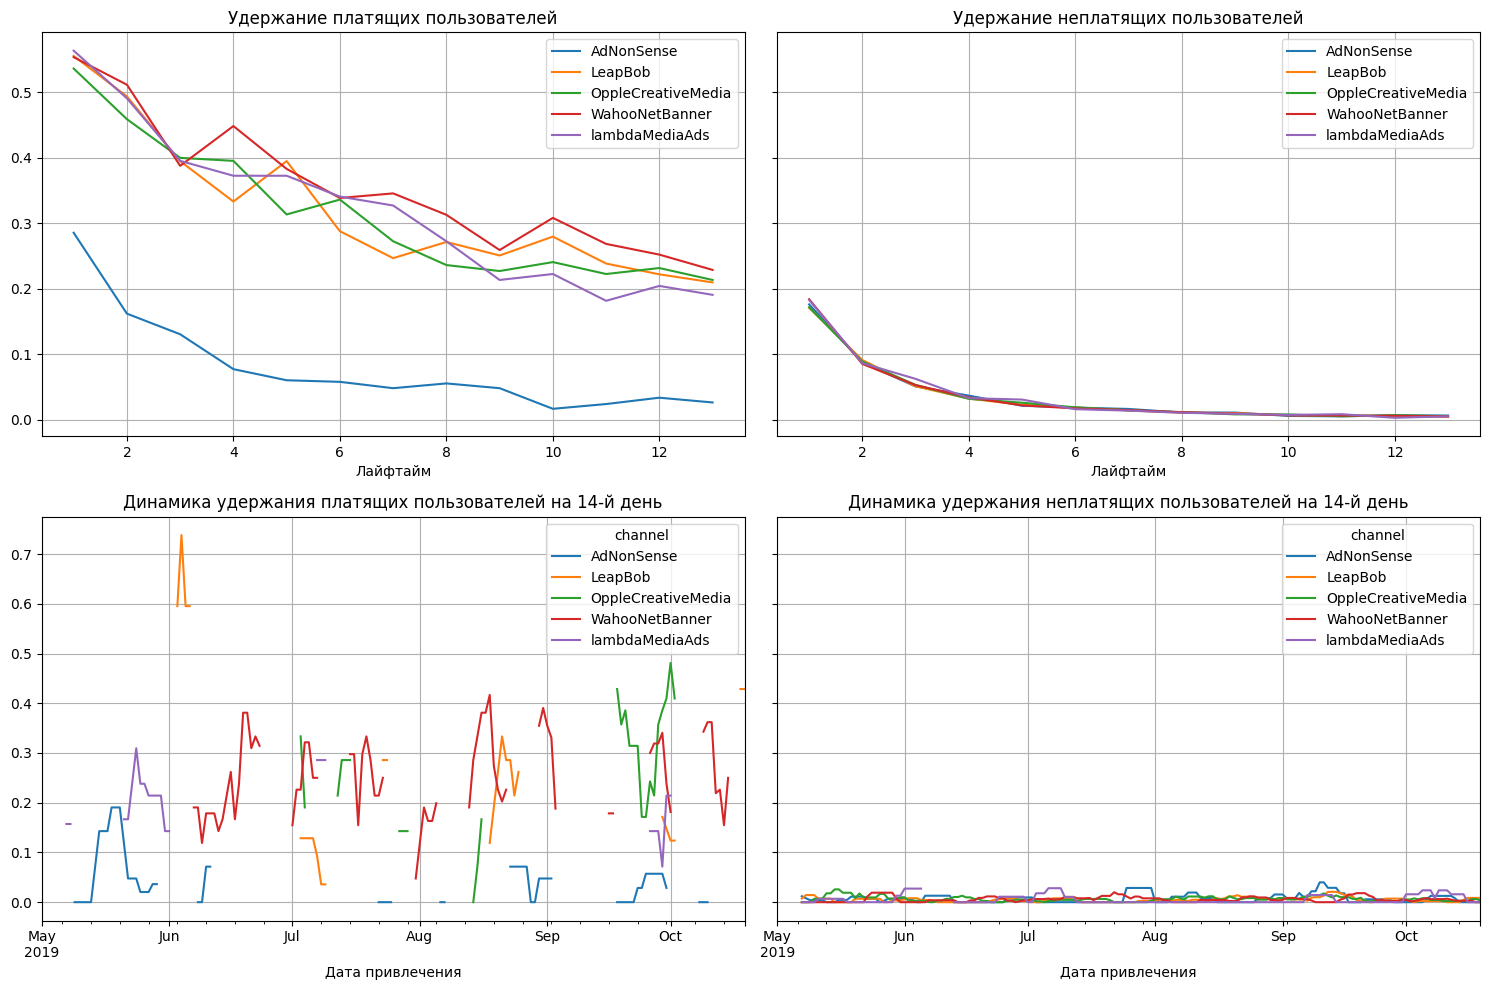

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_p_EU,visits,observation_date,horizon_days,dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Для AdNonSense очевидно проблема окупаемости связана с удержанием платящих пользователей.

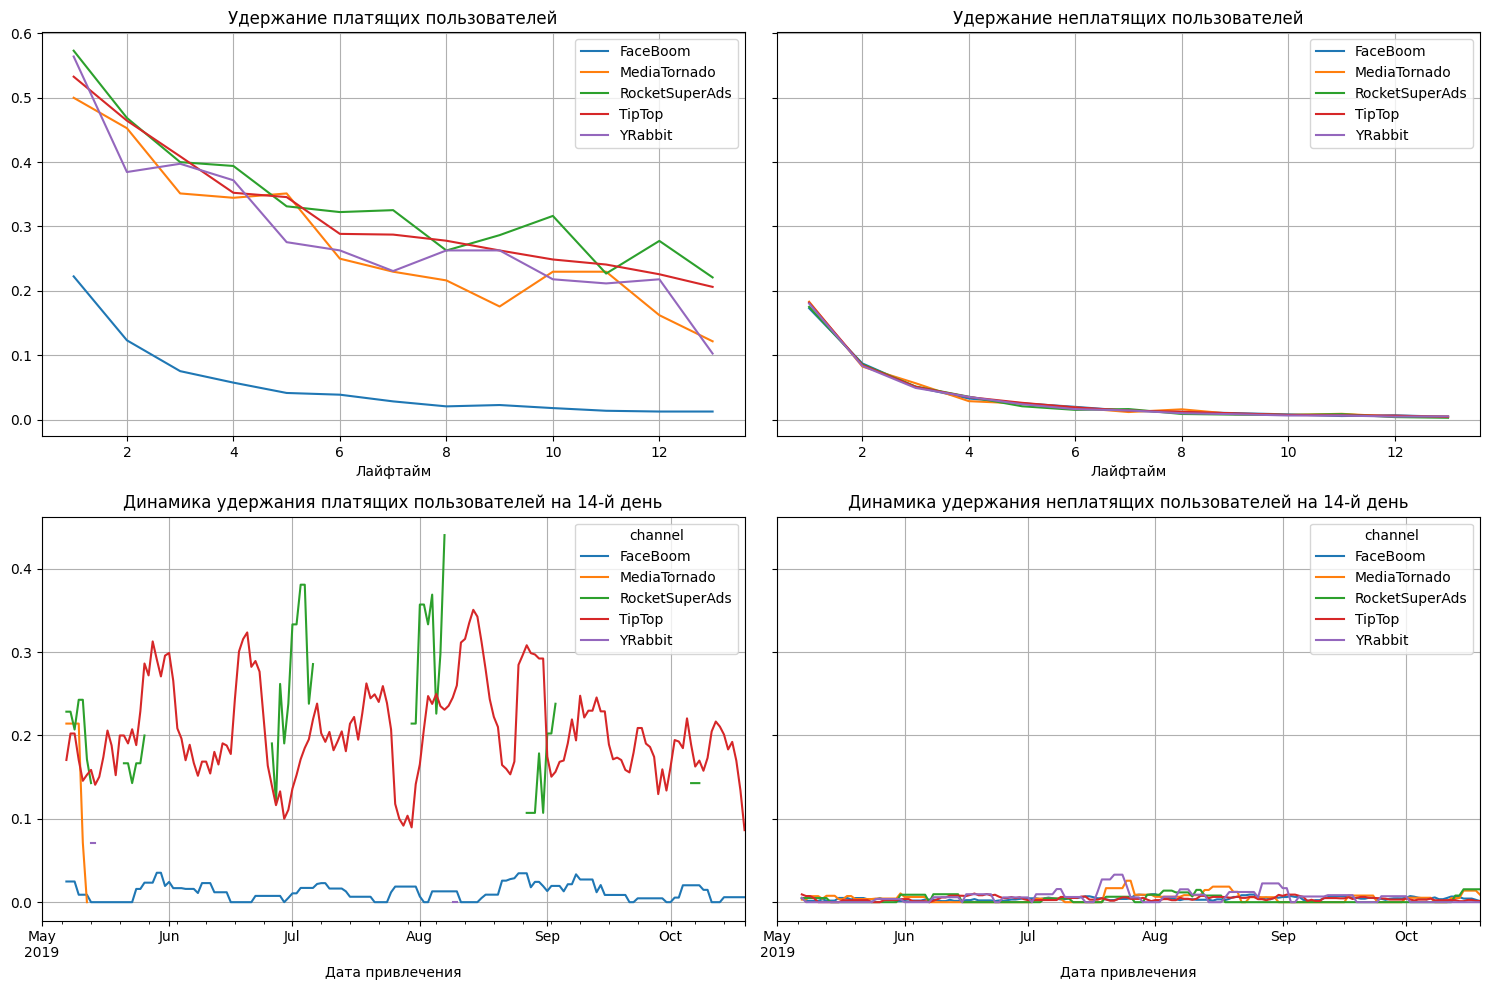

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_p_US,visits,observation_date,horizon_days,dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

В США у FaceBoom тоже плохо с удержанием, а в целом удержание падает быстрее чем в европе.

Для двух укрёпнённых регионов так же посмотрим консервию.

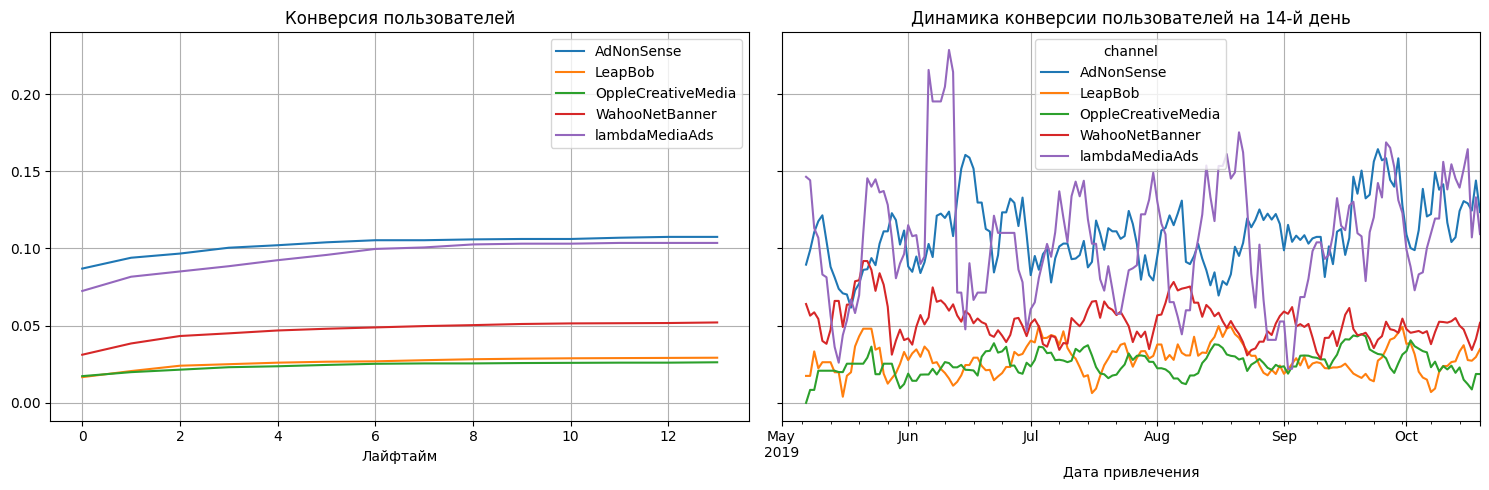

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_p_EU,orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False,)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

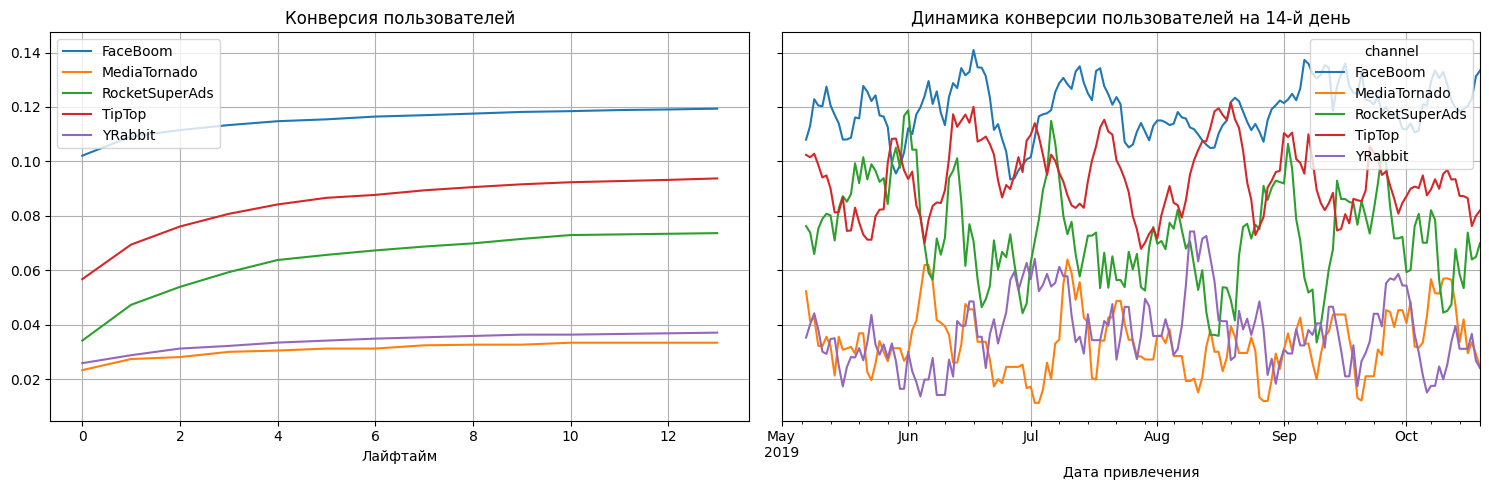

In [52]:
conversion_raw, conversion,  conversion_history = get_conversion(
    profiles_p_US,orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False,)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Конверсия у лидеров по стоимость пусть и большая и стабильная, но не окупается, а вот у остальных низкая и её динамика не меняется в долгой перспективе.
Немного иначе обстоит дело в европе - AdNonSense и lambdaMediaAds лидируют по конверсии и в динамике она улучшается.

## Вывод

В общем, реклама приложения не достигает ожидаемой окупаемости. Доходность на инвестиции (ROI) к концу второй недели составляет всего 80%, при этом затраты на рекламу продолжают расти, а окупаемость снижается в соответствии с увеличением затрат.

Устройства iPhone и Mac негативно влияют на окупаемость, поскольку стоимость рекламы на этих платформах постоянно увеличивается, и даже при приемлемой конверсии реклама не окупается.

Страна, на которую нацелена рекламная кампания, также играет роль. Например, в США реклама не окупается к концу второй недели, несмотря на нормальную конверсию, поскольку стоимость размещения растет, а уровень удержания пользователей ниже, чем в других странах.

Реклама, размещенная на платформах FaceBoom, TipTop и AdNonSense, также не окупается за две недели. Хотя высокая стоимость размещения на TipTop объясняет низкую окупаемость, другие две платформы не могут достичь окупаемости даже при относительно низкой стоимости.

На рассмотренных графиках мы заметили проблемы с окупаемостью у нескольких рекламных каналов, она  связана с высокой стоимостью привлечениея, низкой конверсией и плохим удержанием пользователей. Так же можно предположить что приложение быо протестировано лучше для устройств Apple,чем для других.

В целом, финансовые убытки Procrastinate Pro+ связаны с высокими и постоянно растущими затратами на рекламу на выбранных рекламных платформах и рынках стран. Так же нами была замечена сезонность и достаточно большое колличество пользоватей приходязих через органический канал(но они плохо конвертируются).

## Общий вывод

При первичном анализе датафреймов не было найдено ни дубликатов, ни пропущенных значений, что указывает на качественный и аккуратный сбор данных. В процессе предварительной обработки типы данных для дат были изменены, а названия столбцов были приведены к змеиному регистру в соответствии с общепринятыми нормами.  

Вот переформулированный текст:  
	1. iPhone - наиболее распространенная платформа среди пользователей приложения, в то время как Mac занимает последнее место по популярности.  
	2. Интересно, что, несмотря на меньшую популярность, Mac обгоняет iPhone по доле платящих пользователей.  
	3. Пользователи из США составляют большую часть аудитории приложения, и у них также самый высокий процент платящих пользователей.  
	4. Среди рекламных платформ FaceBoom привлекает наибольшее количество пользователей и имеет самую высокую долю платящих пользователей.  
	5. Несмотря на разнообразие рекламных платформ, значительная часть пользователей приходит в приложение самостоятельно, то есть без участия рекламы. Однако доля платящих среди таких пользователей минимальна.  
 
В результате проведенного исследования было выяснено, что общие затраты на рекламу с 1 мая по 27 октября 2019 года составили 105497 долларов. Почти половина этого бюджета (более 50 тысяч долларов) была инвестирована в рекламу на платформе TipTop. FaceBoom, занимающий второе место по объему затрат (33 тысячи долларов), однако, привлекает больше всего пользователей и имеет наибольшую долю платящих пользователей. Оставшиеся 20 тысяч долларов были распределены между другими восемью платформами.
Анализ динамики расходов показал резкое увеличение затрат на рекламу в TipTop в сентябре 2019 года, когда они достигли пика в 14 тысяч долларов в месяц. В то же время бюджет на рекламу в FaceBoom увеличивался более равномерно в течение этого периода. Затраты на остальные восемь платформ оставались стабильными, в среднем не превышая 1000 долларов в месяц.  

Была также рассчитана средняя стоимость привлечения одного пользователя (CAC) для каждой платформы. Выяснилось, что самая высокая стоимость пользователя наблюдается на платформе TipTop - 2.8 доллара. FaceBoom занимает второе место с отставанием более чем в два раза - здесь стоимость привлечения одного пользователя составляет 1.1 доллара. Для остальных платформ средний CAC не превышает 1 доллара. Был проведен анализ общего уровня удержания и конверсии пользователей. Как и ожидалось, платящие пользователи демонстрируют более высокий уровень удержания по сравнению с неплатящими. Однако уровень удержания неплатящих пользователей достаточно низкий и стремится к нулю. Возможно, стоит рассмотреть проведение акций для новых пользователей, чтобы максимизировать количество переходов в категорию платящих. Или стимулировать неплатящих пользователей, например, предлагая ежедневные задания, челленджи, призы за ежедневное использование приложения. В целом, общая конверсия показывает рост, достигая 8% к концу второй недели. Так же мы рассмотрели данные и в разрезах страны, девайсов и каналов(платформ).  

## Рекомендации

Важно отметить, что реклама для устройств iPhone, Mac и для пользователей из США обходится дорого, несмотря на хорошие показатели конверсии и LTV. Из-за высоких затрат реклама не окупается. Необходимо искать более экономичные платформы и условия размещения. Пользователи из США менее лояльны, чем пользователи из других стран. Возможно, стоит предложить им бонусы за ежедневное использование приложения или организовать челленджи, чтобы стимулировать их активность.

Три платформы - TipTop, FaceBoom, AdNonSense - не окупаются в течение двух недель. TipTop и FaceBoom ориентированы на пользователей из США, AdNonSense - на Европу. Неокупаемость TipTop связана с высокими затратами, которые быстро и постоянно растут, и даже хорошие показатели конверсии и удержания пользователей не компенсируют эти затраты. Возможно, стоит сократить бюджет на размещение на этой платформе или пересмотреть стратегию, сделав акцент на другие платформы. FaceBoom и AdNonSense имеют более низкую стоимость размещения и одни из самых высоких показателей конверсии, но также не окупаются. Здесь проблема в низком уровне удержания: пользователи активно переходят по рекламе (FaceBoom лидирует по количеству аудитории), совершают покупки (FaceBoom также лидирует по доле платящих пользователей), но не остаются в приложении. Возможно, реклама не соответствует ожиданиям пользователей или срабатывает за счет привлекательных акций. Стоит подумать об изменении предложения или о мерах по удержанию этих пользователей, например, организации челленджей, ежедневных заданий, предложении бонусов за ежедневное использование, чтобы мотивировать пользователей регулярно заходить в приложение.

Также стоит обратить внимание на две платформы, которые окупаются и имеют низкую стоимость размещения. OppleCreativeMedia для США привлекает аудиторию с очень низкой конверсией, а окупаемость достигается только за счет низкой стоимости. Стоит проанализировать аудиторию на этой платформе и поэкспериментировать с рекламным предложением, чтобы найти формат, который будет мотивировать пользователей на покупку - акция, промокод, ограниченный срок действия. Следующая платформа lambdaMediaAds для Европы окупается уже на 3-й день, стоимость размещения низкая, но оттуда приходит очень мало людей (около 2 тысяч). Стоит попробовать составить разные рекламные макеты, лучше проанализировать аудиторию этой платформы и выяснить, чем их можно привлечь. Низкая стоимость и окупаемость этих платформ позволяют провести эксперименты и попробовать что-то новое, они могут "выстрелить".  

 Стоит рассмотреть более выгодные предложения и площадки для рекламы для iPhone и Mac. Также можно рассмотреть возможность увеличения конверсии среди владельцев PC, предлагая дополнительные бонусы за покупку компьютерной версии приложения, улучшая интерфейс. Несмотря на то, что пользователей с устройствами Mac меньше, чем с PC, они лучше конвертируются в покупки. Уровень удержания пользователей примерно одинаков и не зависит от устройства.    
 
 В США довольно нелояльные пользователи и очень дорогая реклама, в других же странах окупается, даже при более низком уровне конверсии - необходимо пересмотреть рекламную стратегии для рынка США.
  Рекламные кампании на остальных платформах демонстрируют стабильную окупаемость, средний уровень конверсии и удержания. На данный момент размещение рекламы на этих платформах можно сохранить. Однако, следует уделить внимание работе с указанными выше платформами, чтобы повысить прибыльность компании.  